Nama : Simen Ferdinand Djamhari

In [3]:
#!pip install split-folders

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
import splitfolders
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2
import os
from PIL import Image
from skimage import io

Import Library yang dibutuhkan

# A

### Histogram Batik Ceplok

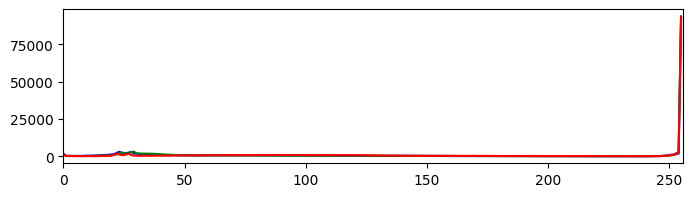

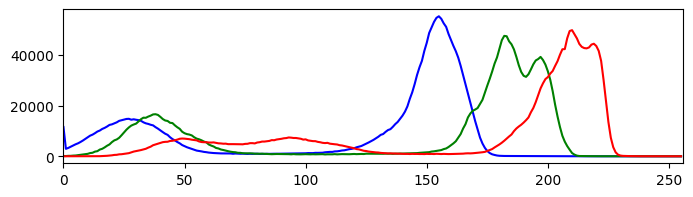

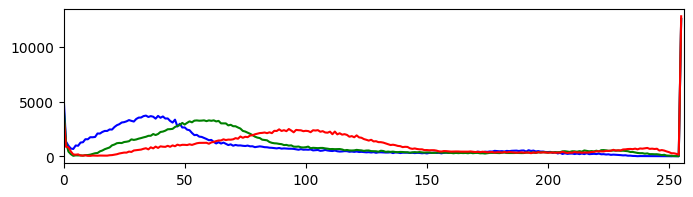

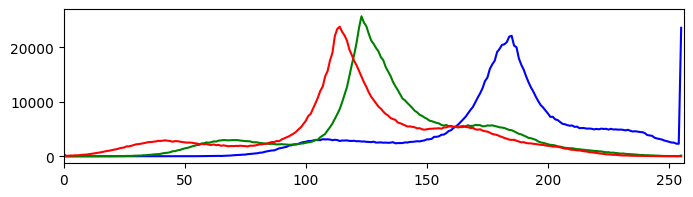

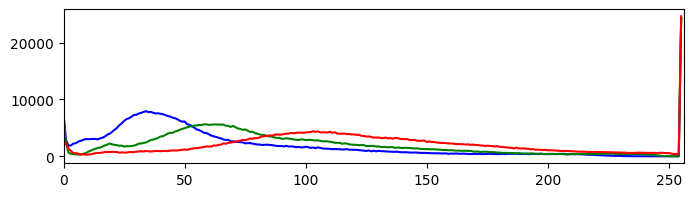

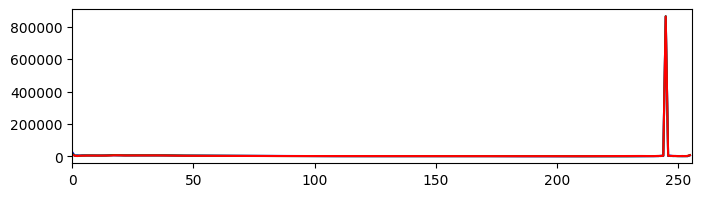

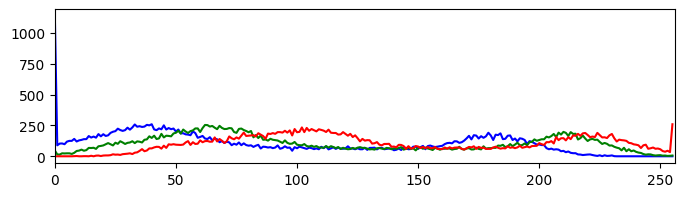

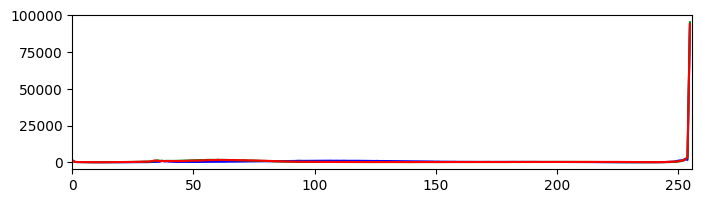

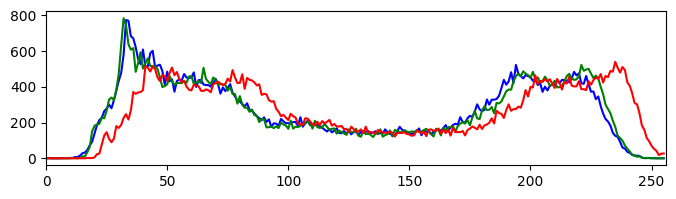

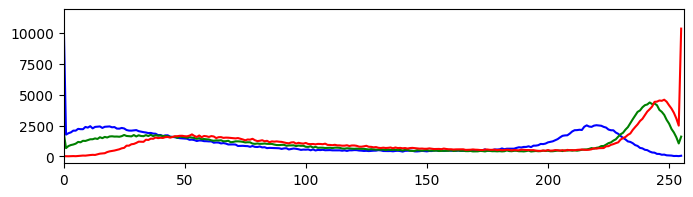

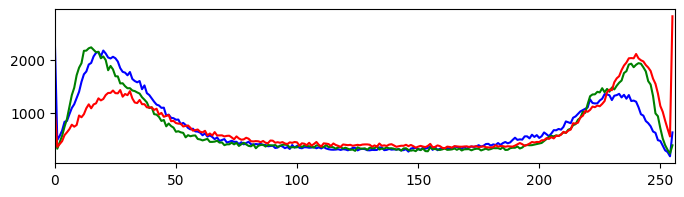

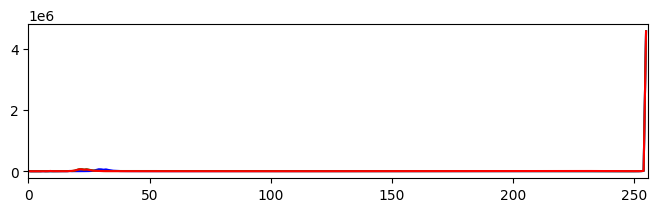

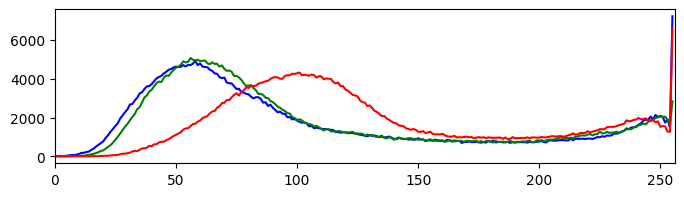

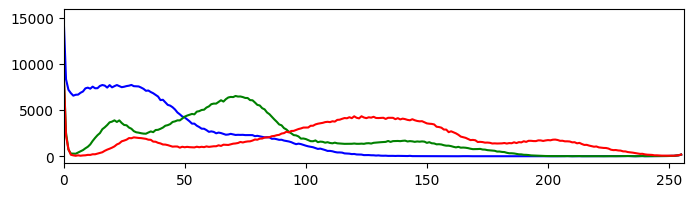

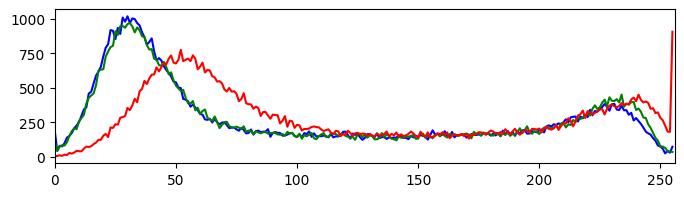

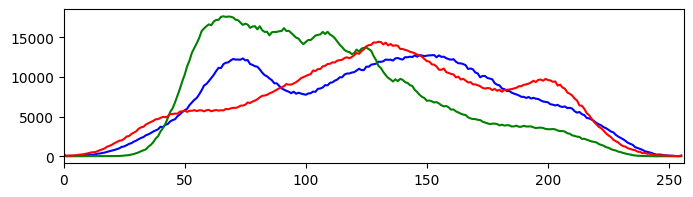

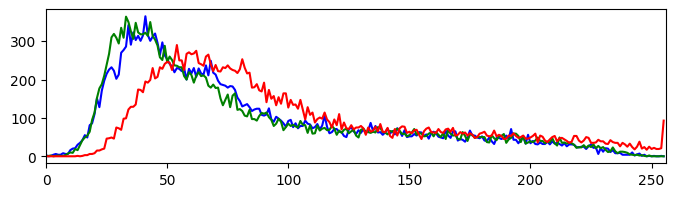

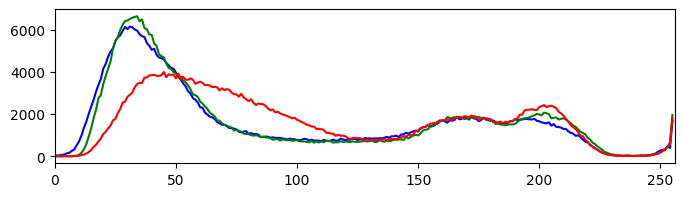

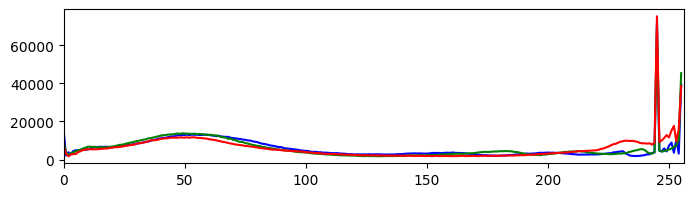

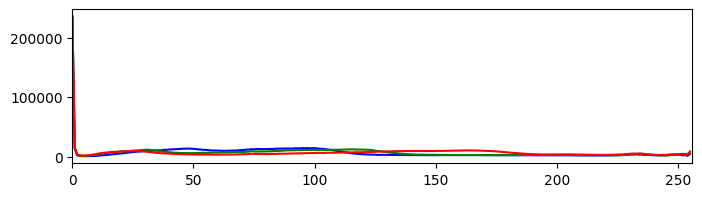

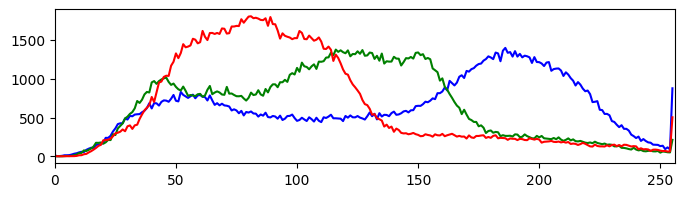

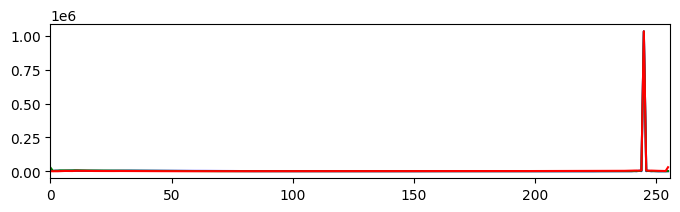

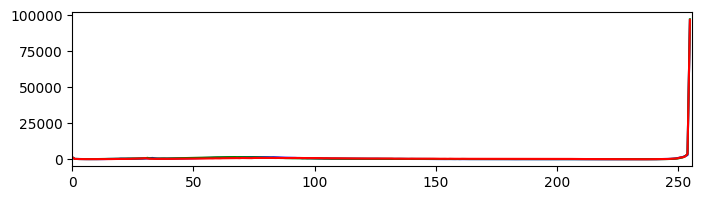

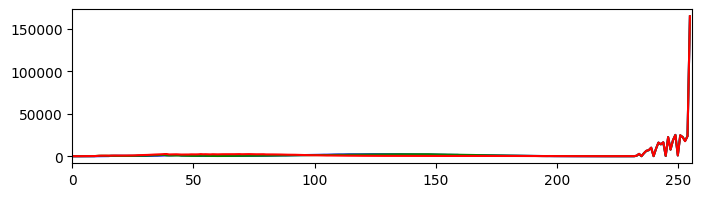

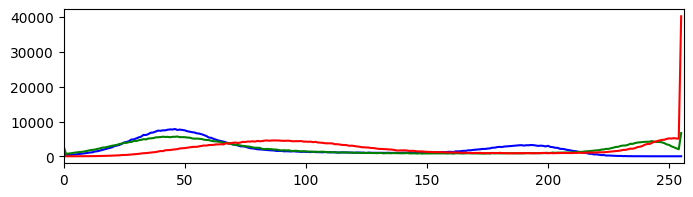

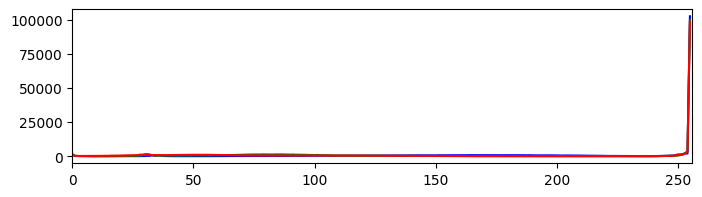

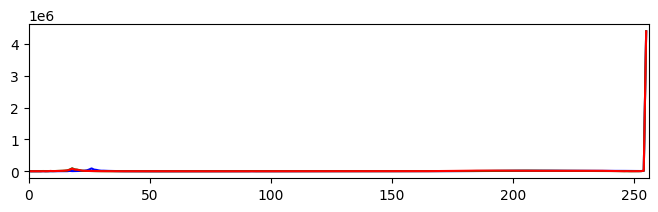

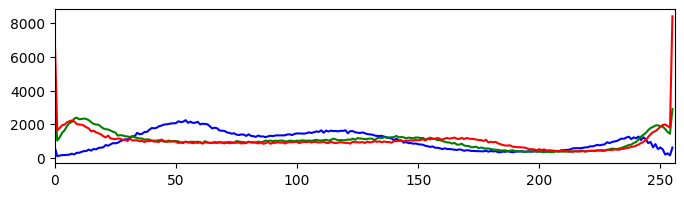

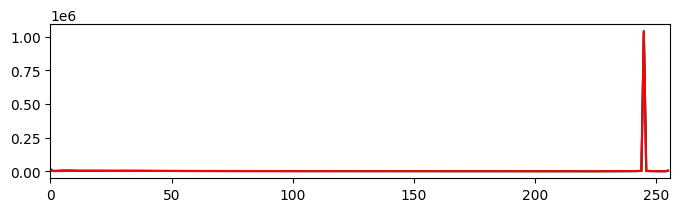

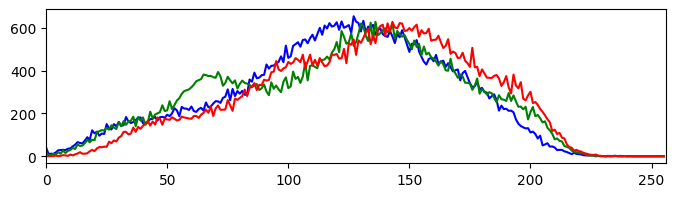

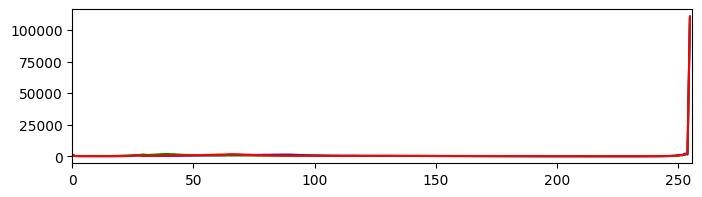

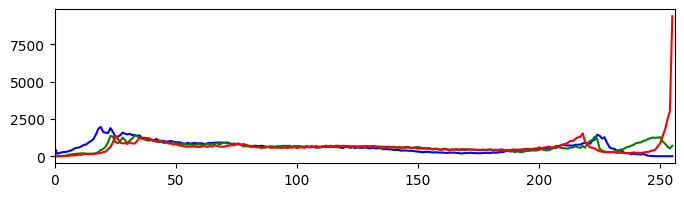

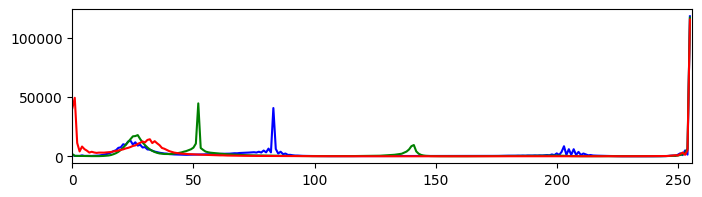

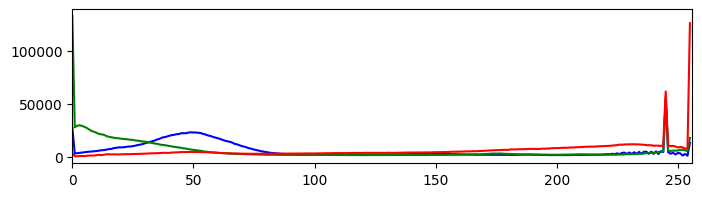

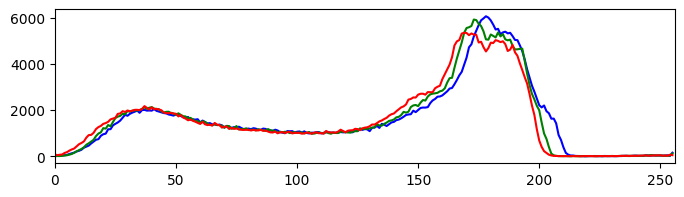

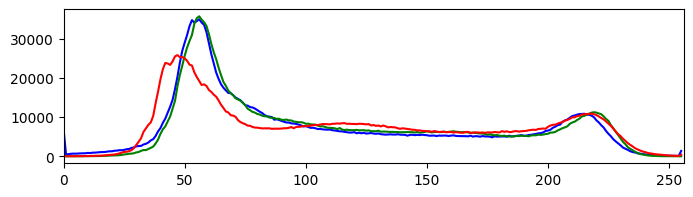

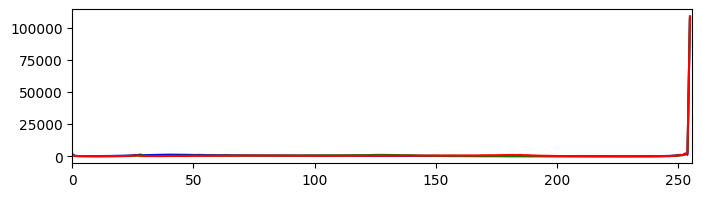

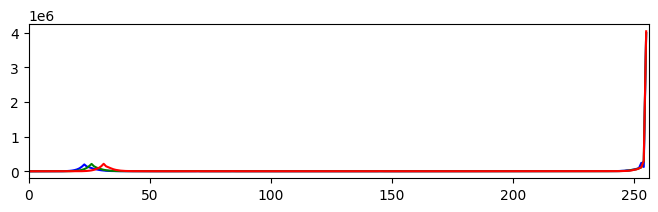

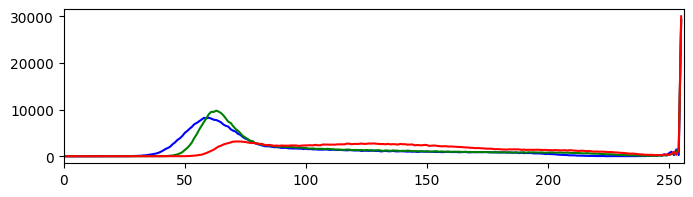

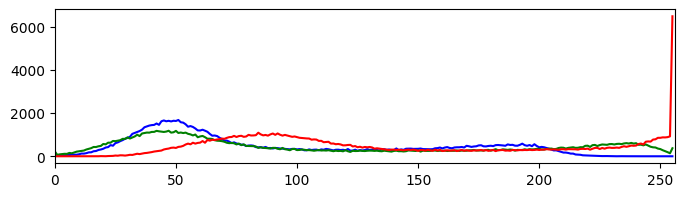

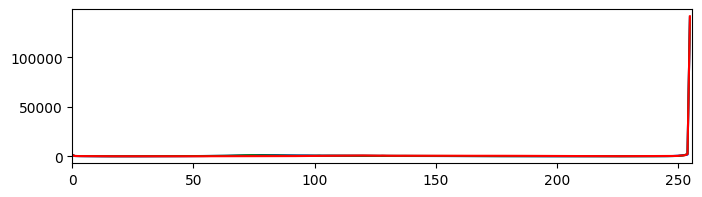

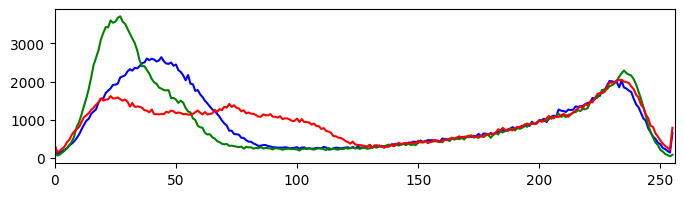

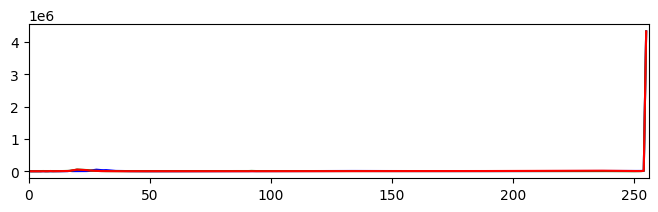

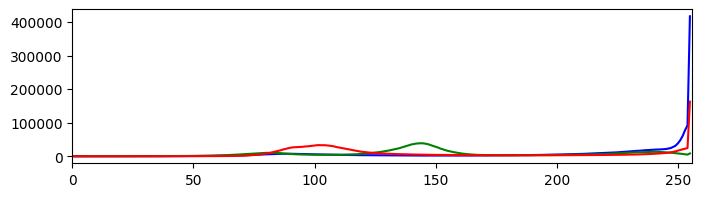

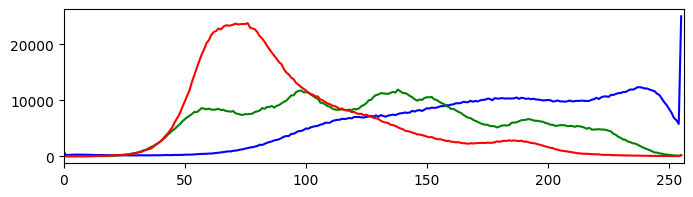

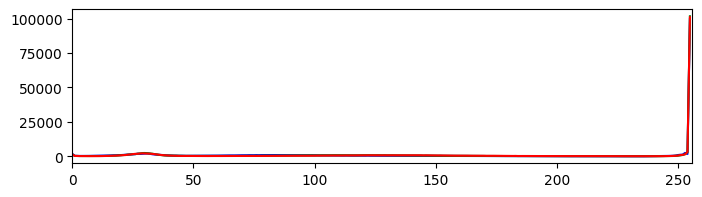

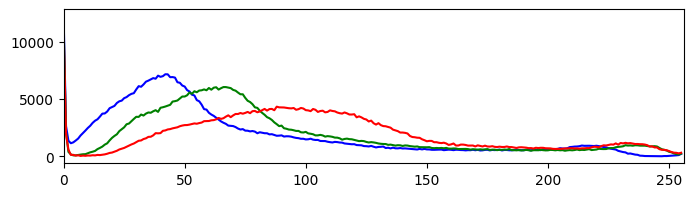

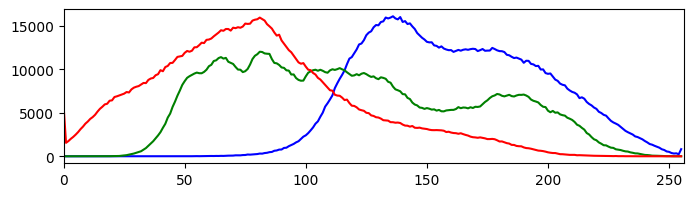

In [4]:
path_ceplok = ('/kaggle/input/data-2a/Dataset2A/batik-ceplok')

for filename in os.listdir(path_ceplok):
    plt.figure(figsize = (8, 2))
    if filename.endswith('.jpg'):
        img_file = os.path.join(path_ceplok, filename)
        img = cv2.imread(img_file)
        if img is None:
            continue
        colors = ('b', 'g', 'r')
        for i, col in enumerate(colors):
            hist = cv2.calcHist([img], [i], None, [256], [0, 256])
            plt.plot(hist, color= col)
            plt.xlim([0, 256])
            
        plt.show()

Histogram diatas adalah histogram warna untuk setiap gambar yang ada di batik-ceplok

### Histogram Batik Bali

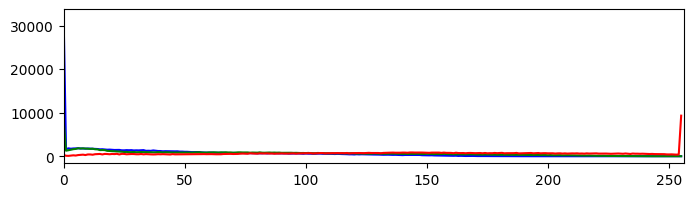

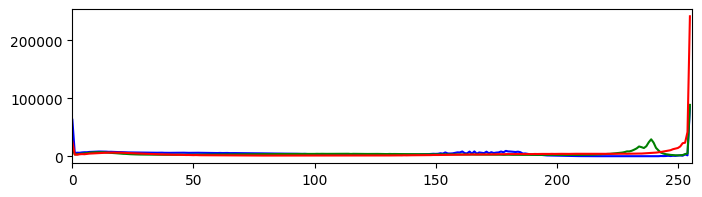

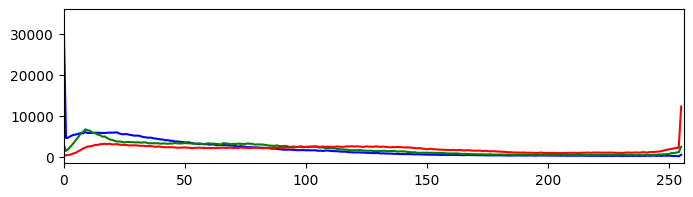

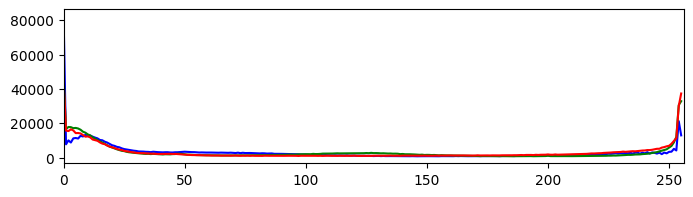

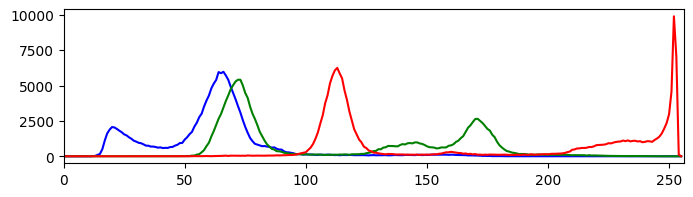

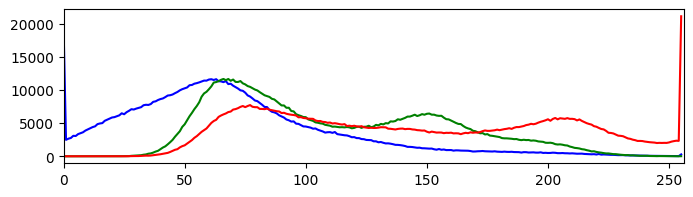

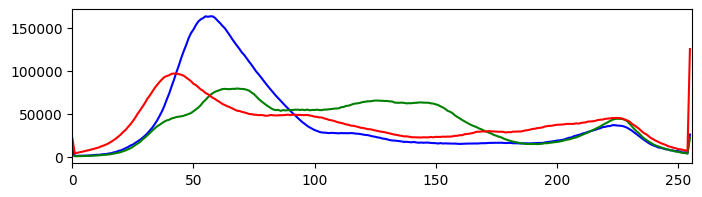

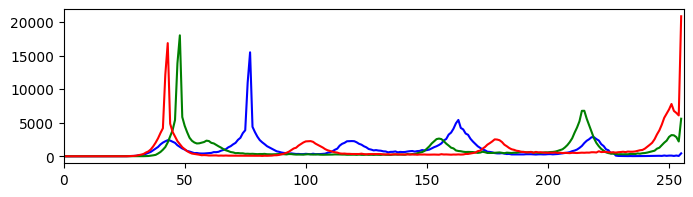

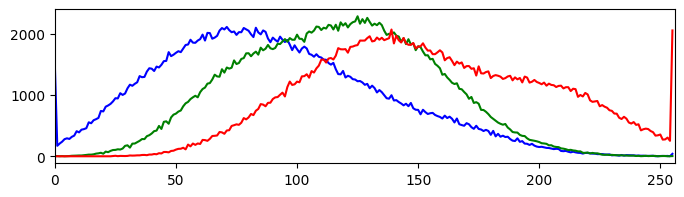

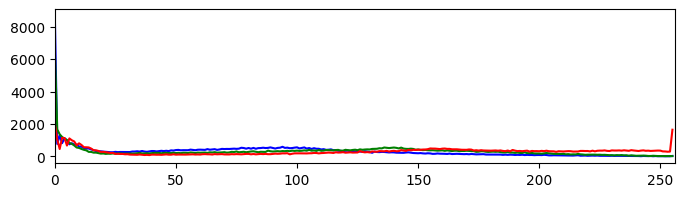

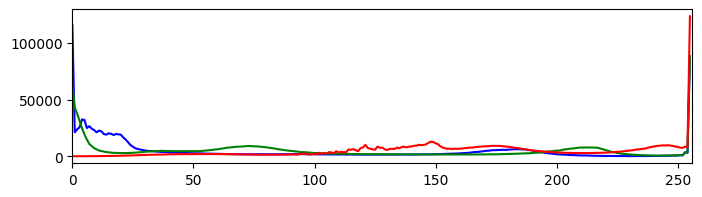

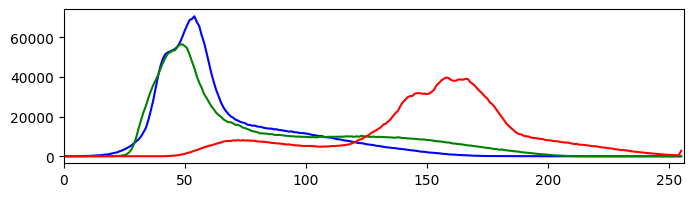

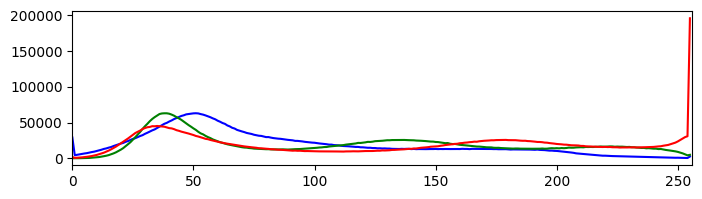

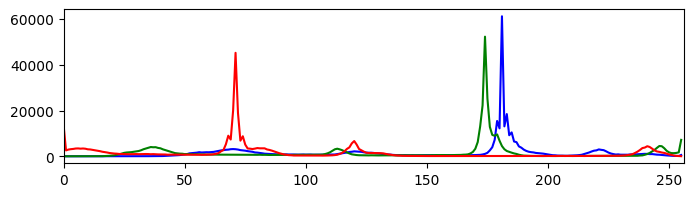

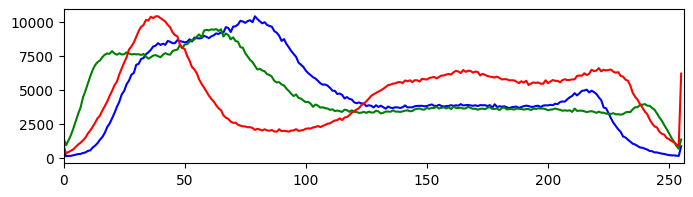

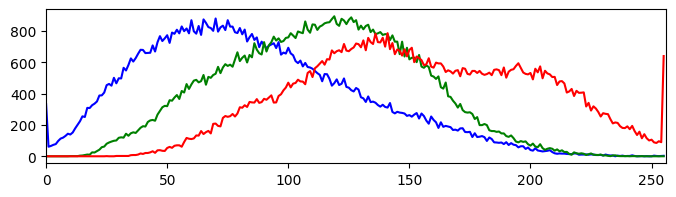

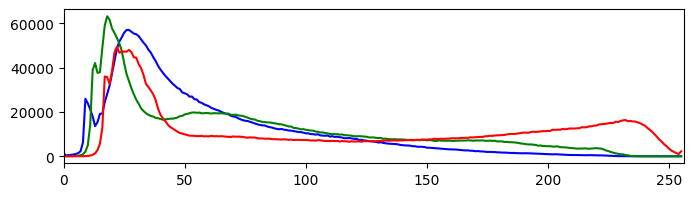

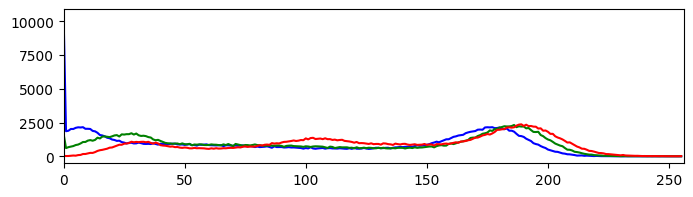

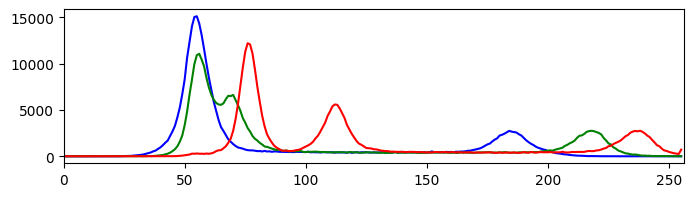

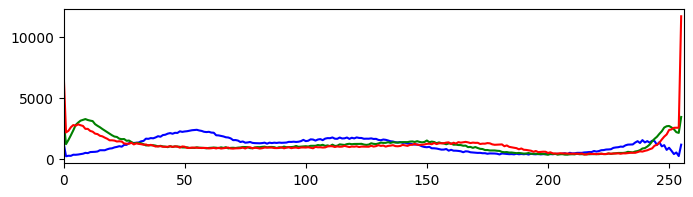

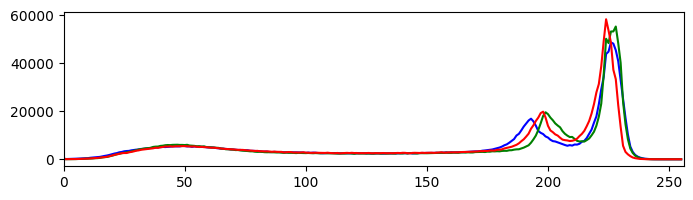

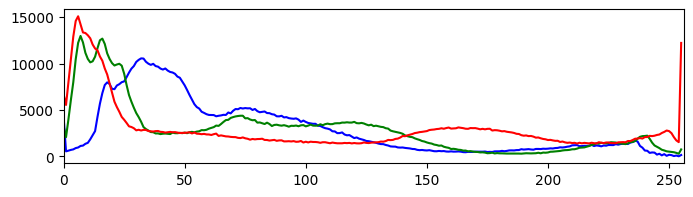

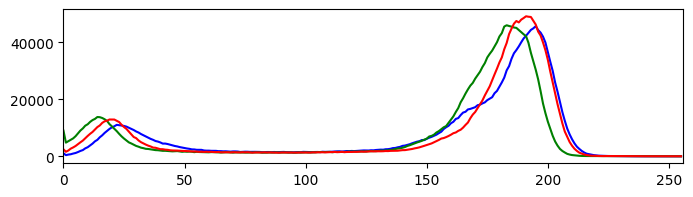

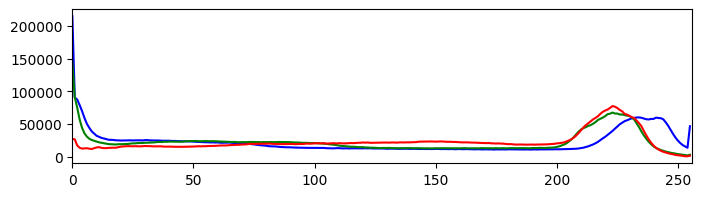

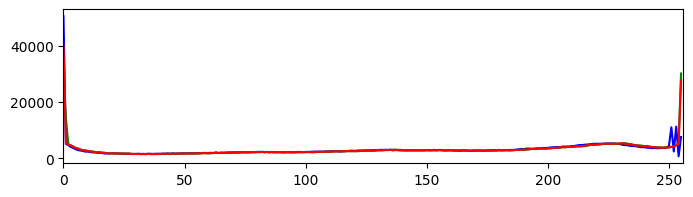

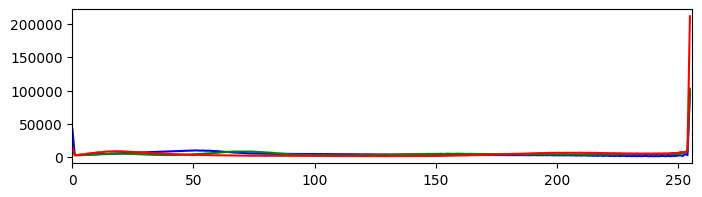

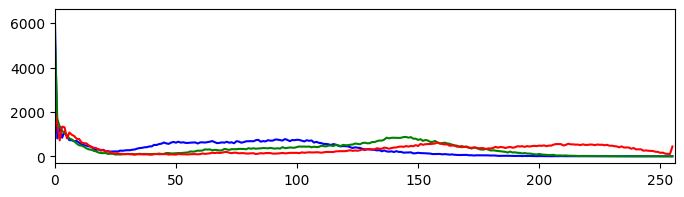

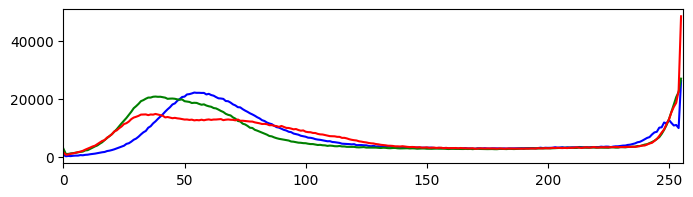

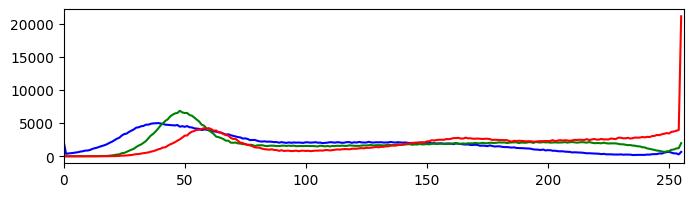

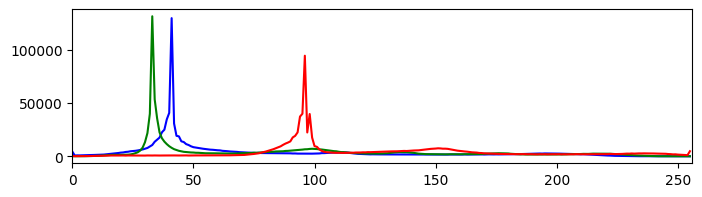

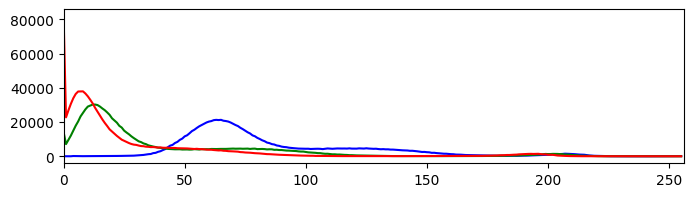

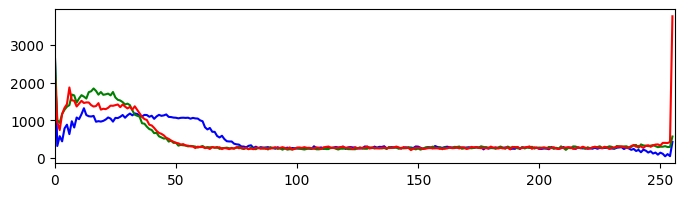

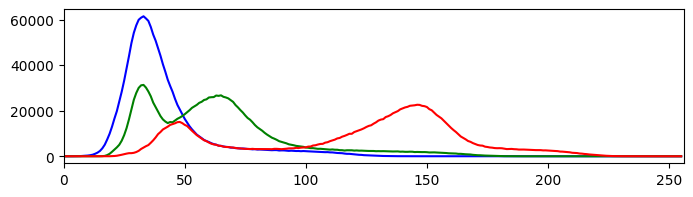

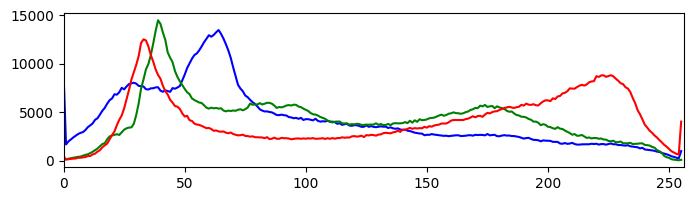

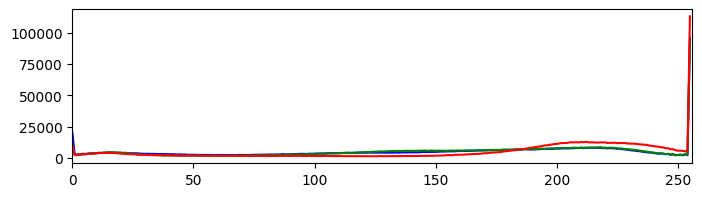

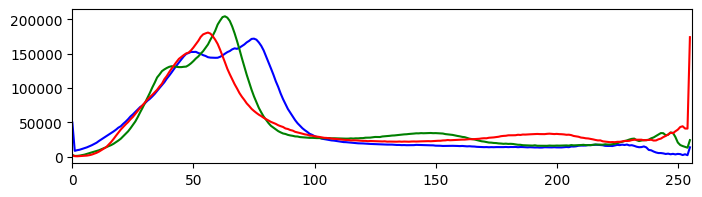

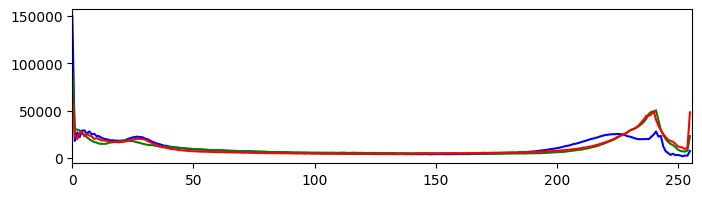

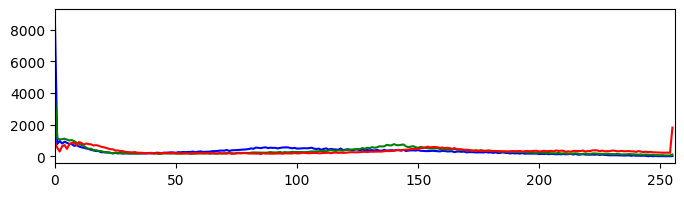

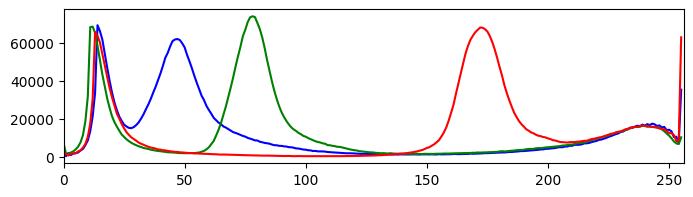

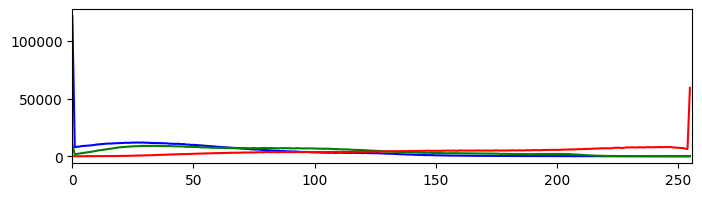

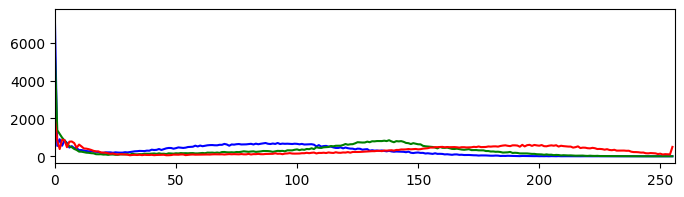

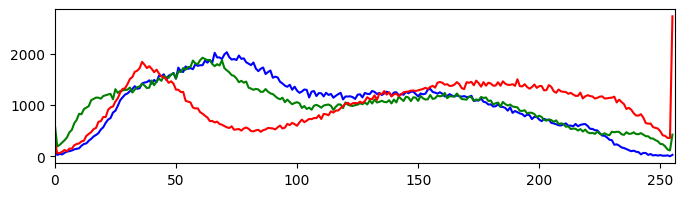

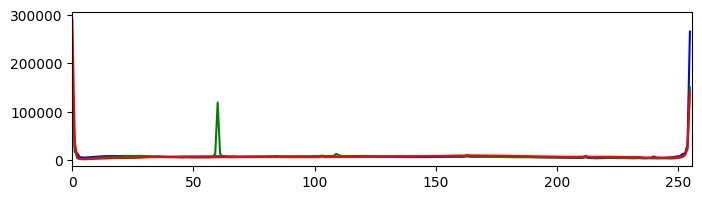

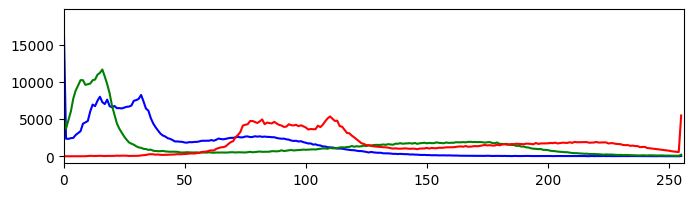

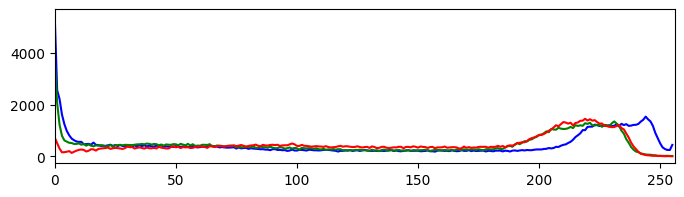

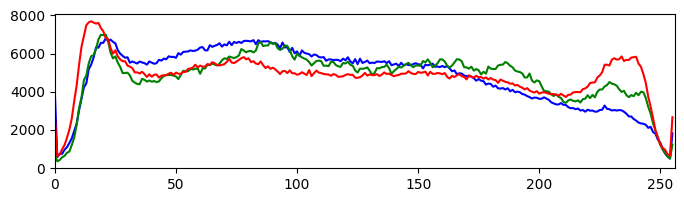

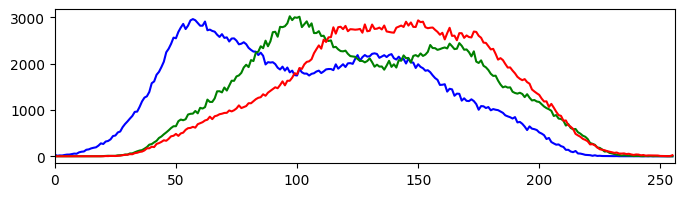

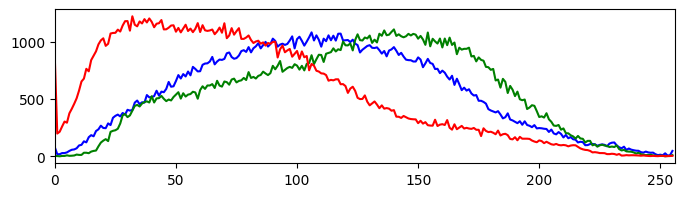

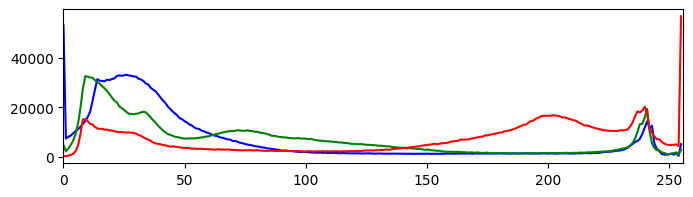

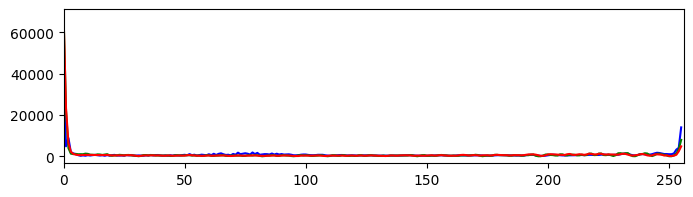

In [325]:
path_bali = ('/kaggle/input/data-2a/Dataset2A/batik-bali')


for filename in os.listdir(path_bali):
    plt.figure(figsize = (8, 2))
    if filename.endswith('.jpg'):
        img_file = os.path.join(path_bali, filename)
        img = cv2.imread(img_file)
        colors = ('b', 'g', 'r')
        for i, col in enumerate(colors):
            hist = cv2.calcHist([img], [i], None, [256], [0, 256])
            plt.plot(hist, color= col)
            plt.xlim([0, 256])
            
        plt.show()

Histogram diatas adalah histogram warna untuk setiap gambar yang ada di batik-bali

### Histogram Batik Betawi

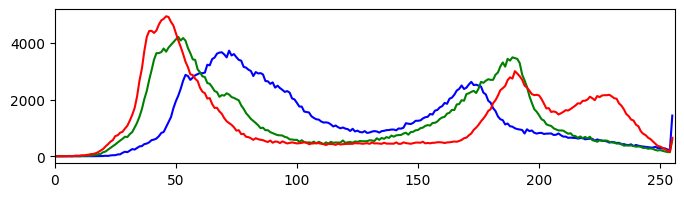

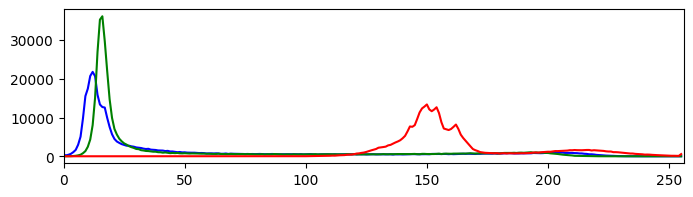

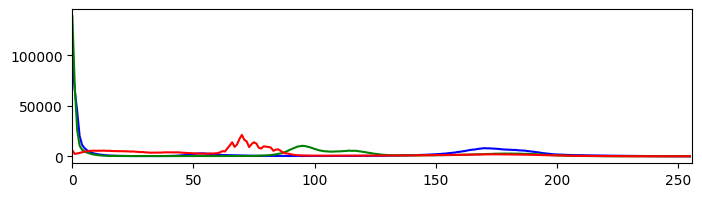

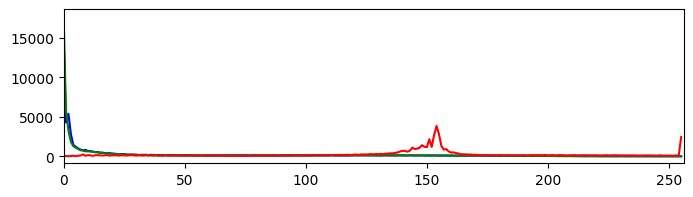

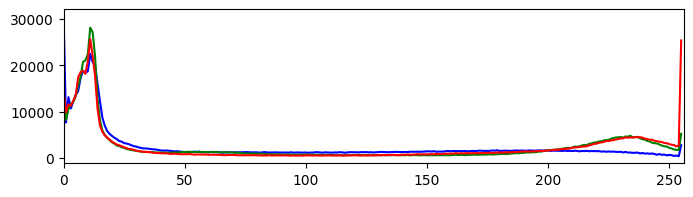

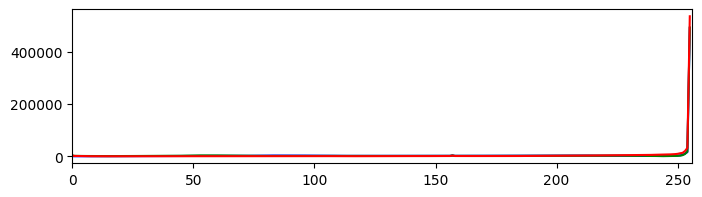

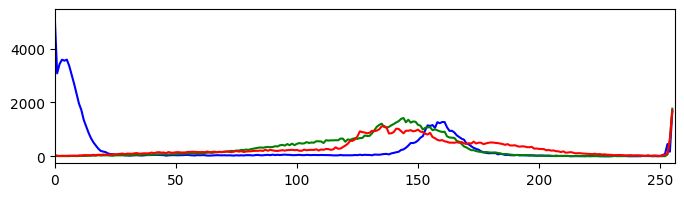

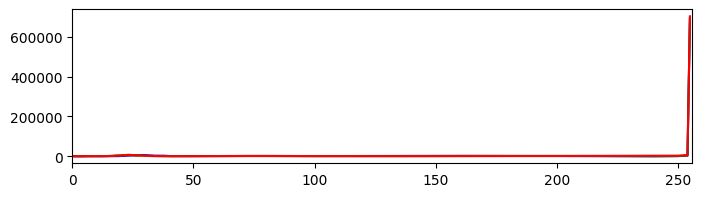

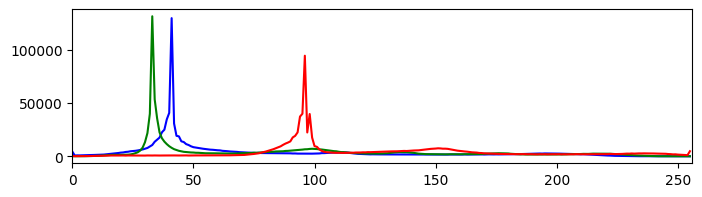

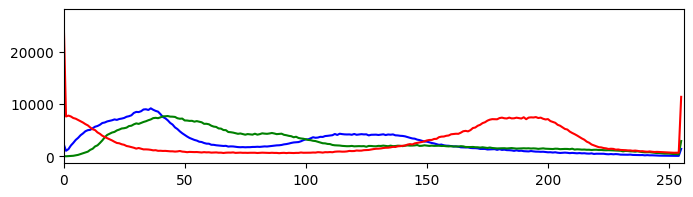

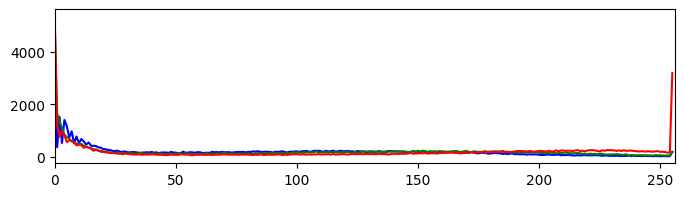

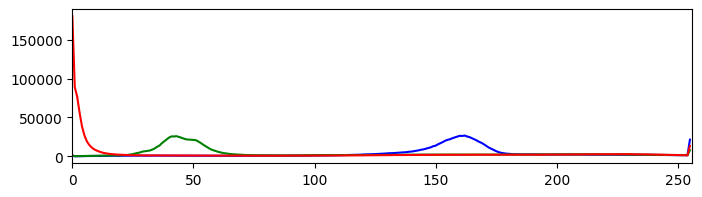

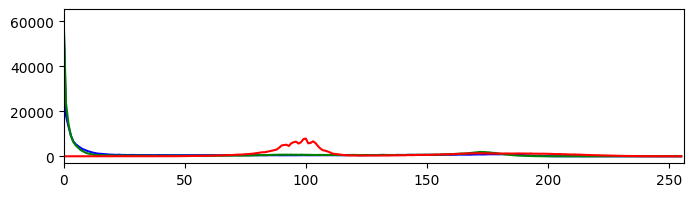

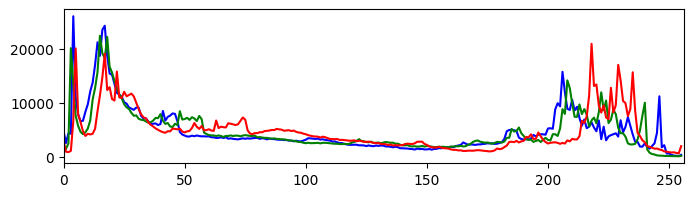

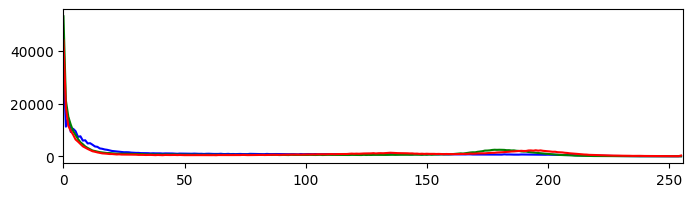

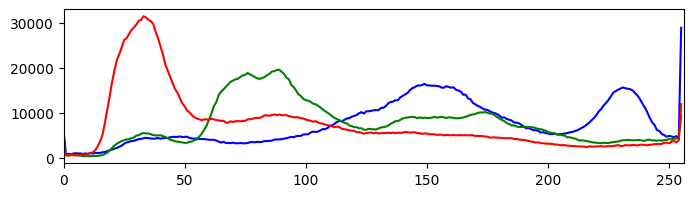

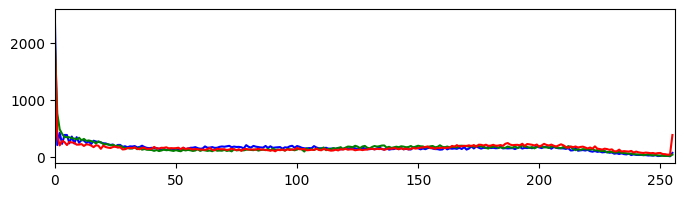

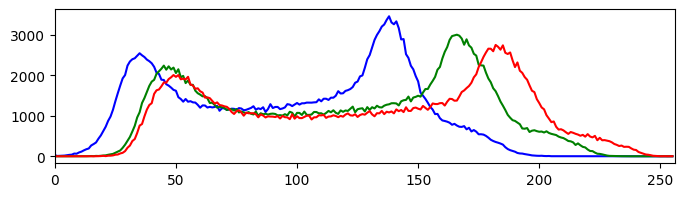

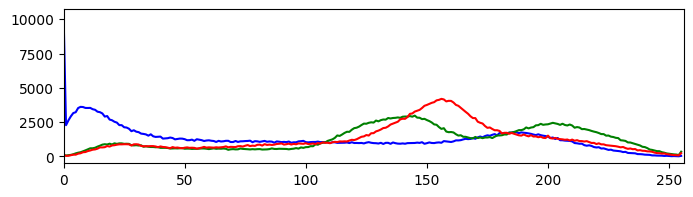

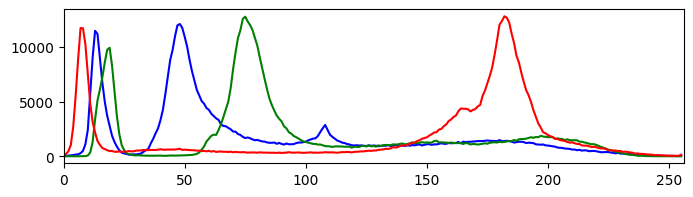

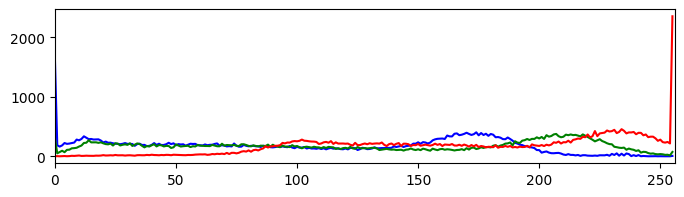

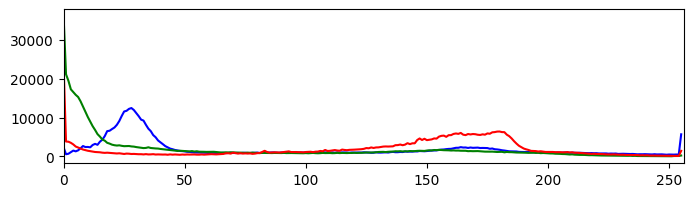

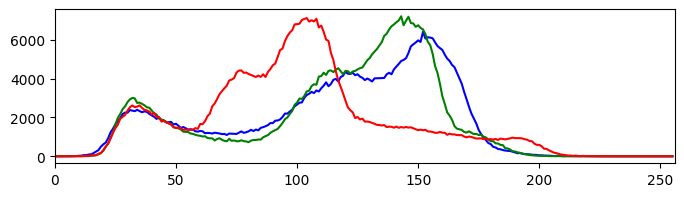

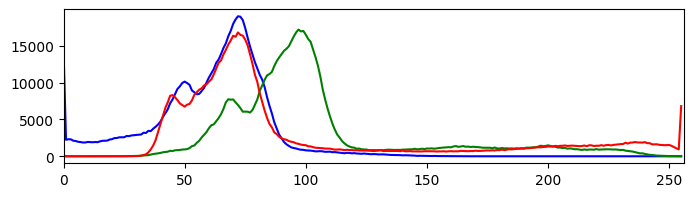

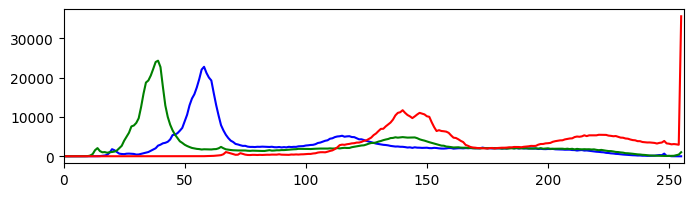

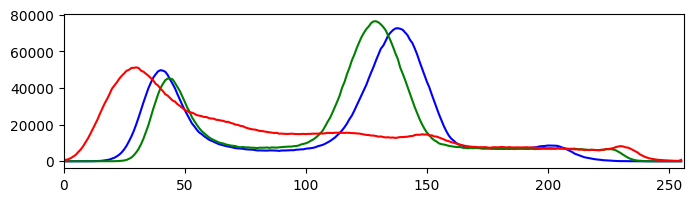

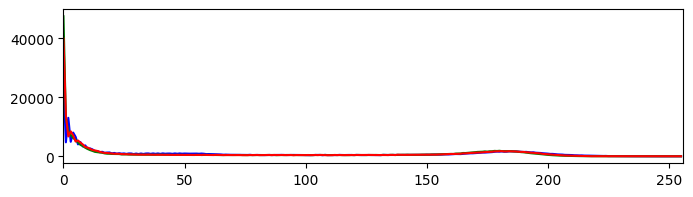

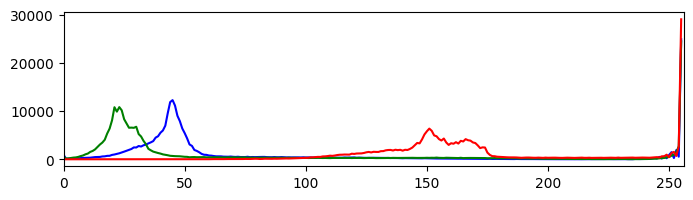

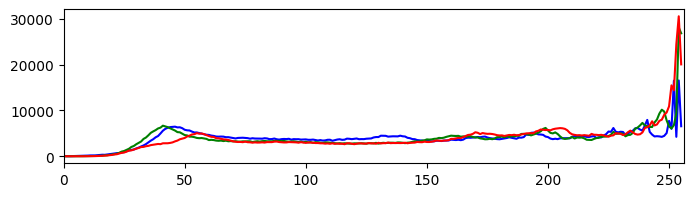

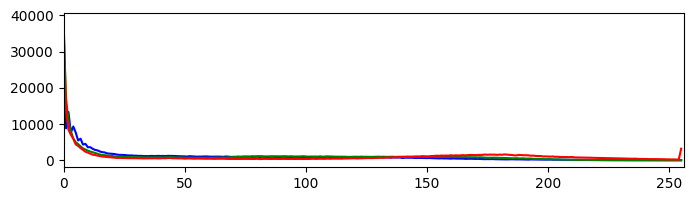

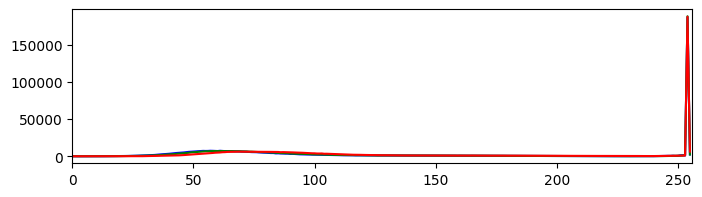

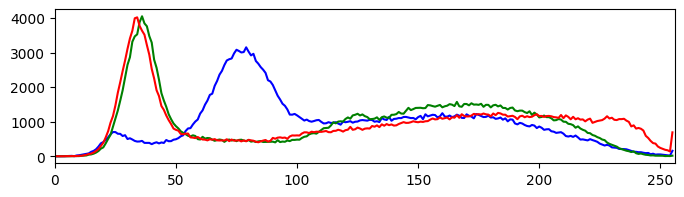

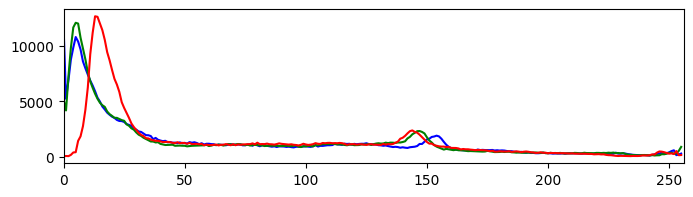

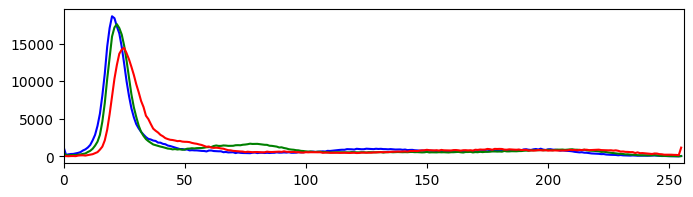

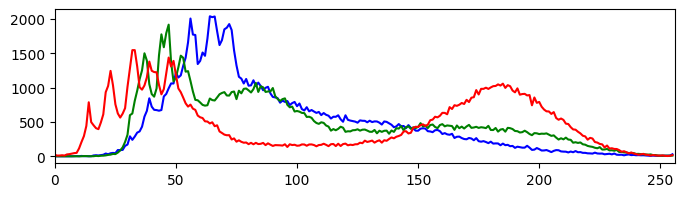

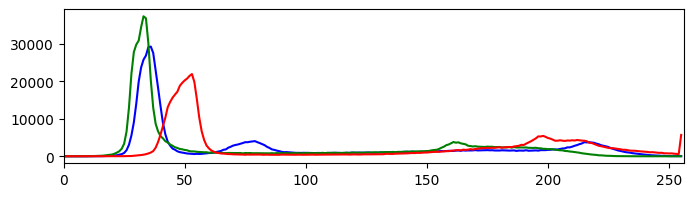

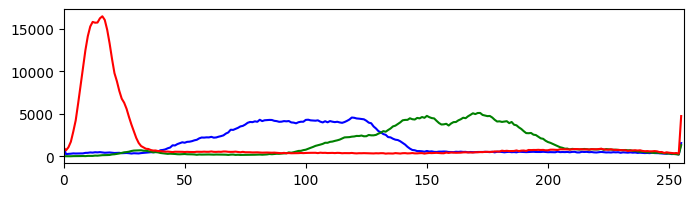

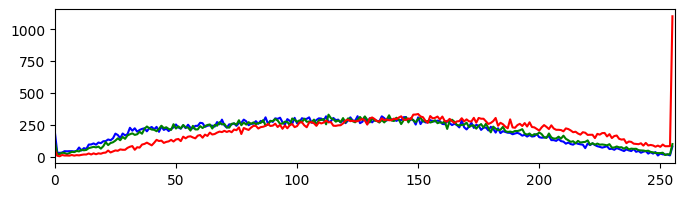

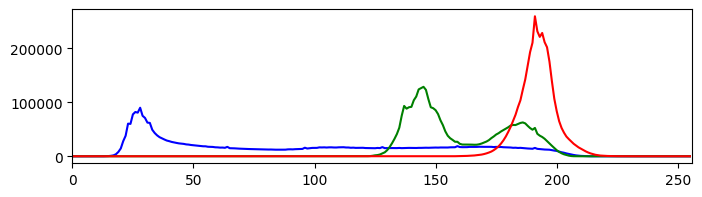

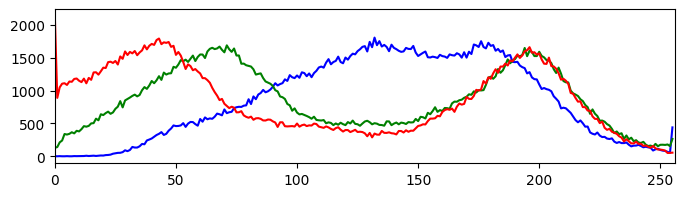

<Figure size 800x200 with 0 Axes>

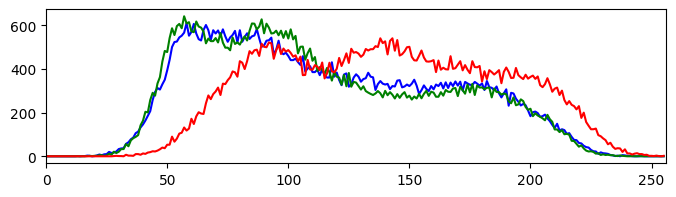

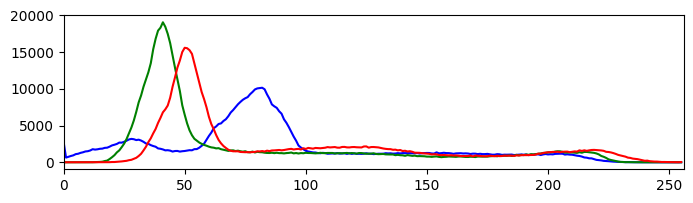

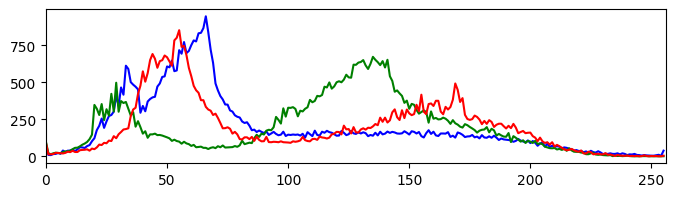

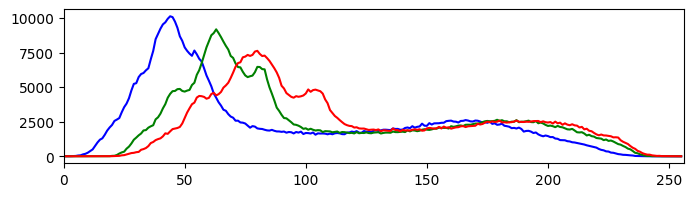

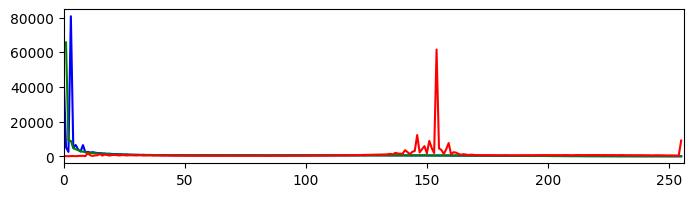

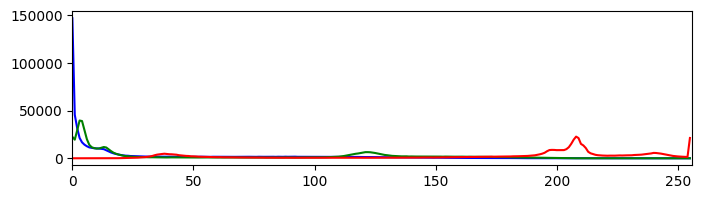

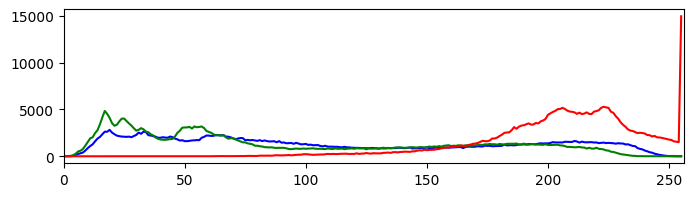

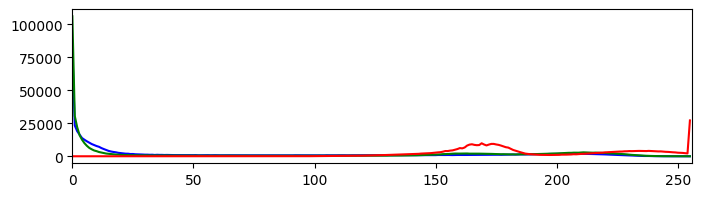

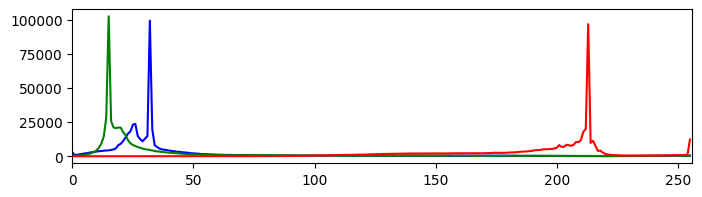

In [326]:
path_betawi = ('/kaggle/input/data-2a/Dataset2A/batik-betawi')


for filename in os.listdir(path_betawi):
    plt.figure(figsize = (8, 2))
    if filename.endswith('.jpg'):
        img_file = os.path.join(path_betawi, filename)
        img = cv2.imread(img_file)
        if img is None:
            continue
        colors = ('b', 'g', 'r')
        for i, col in enumerate(colors):
            hist = cv2.calcHist([img], [i], None, [256], [0, 256])
            plt.plot(hist, color= col)
            plt.xlim([0, 256])
            
        plt.show()

Histogram diatas adalah histogram warna untuk setiap gambar yang ada di batik-betawi

### Histogram Batik Cendrawasih

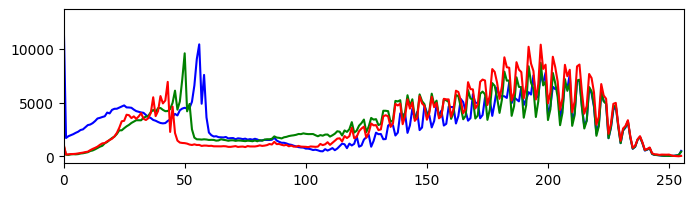

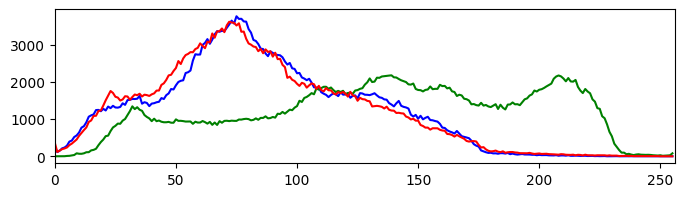

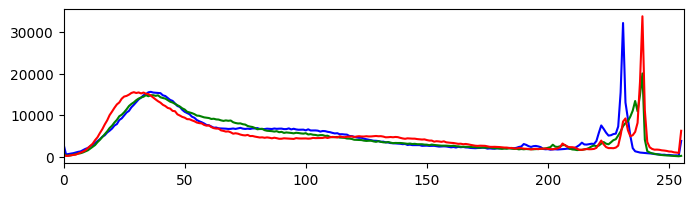

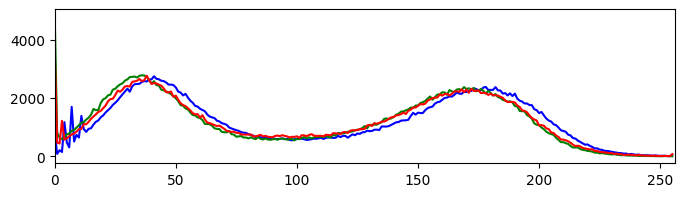

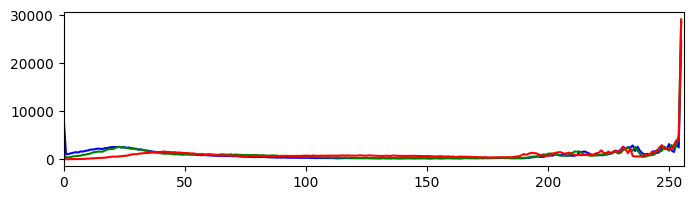

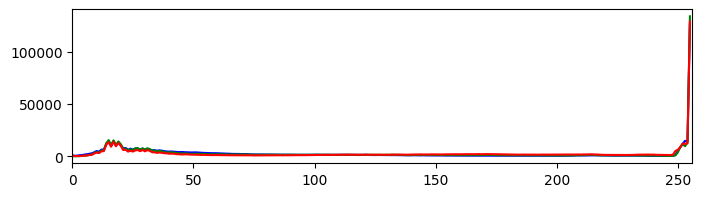

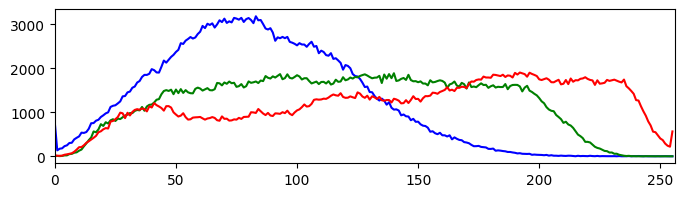

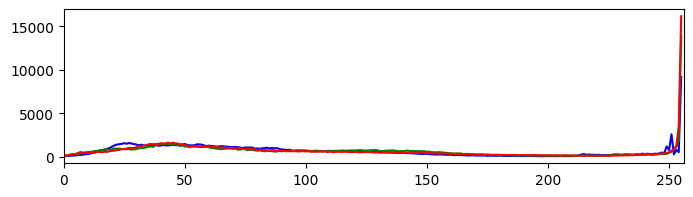

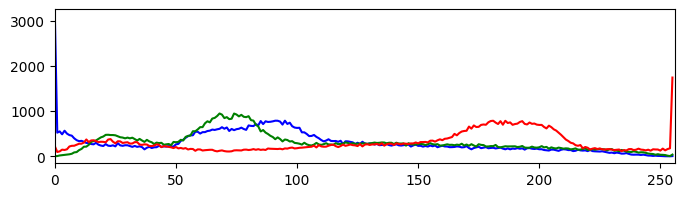

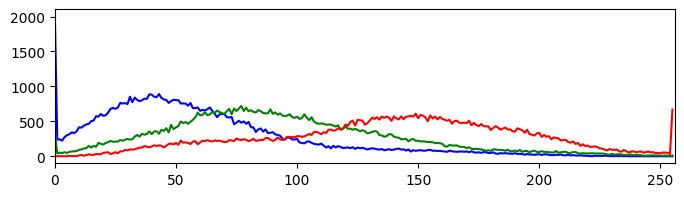

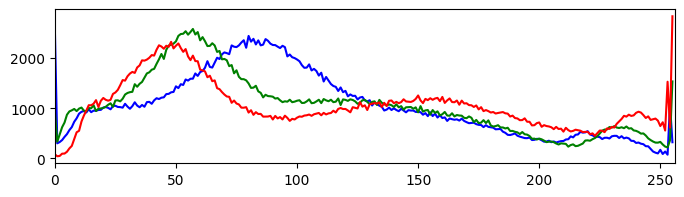

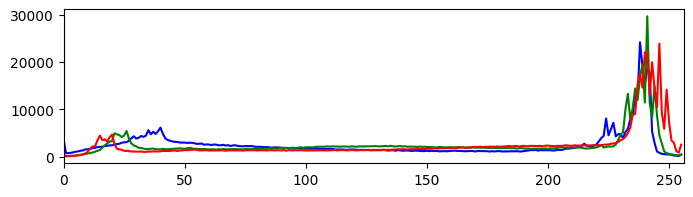

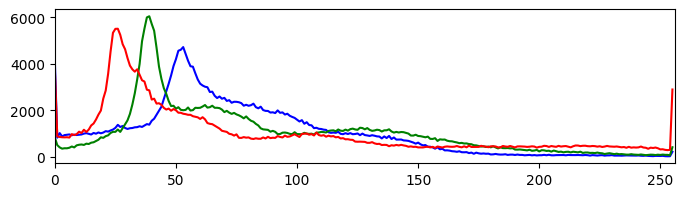

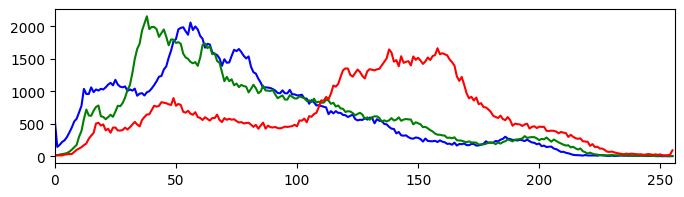

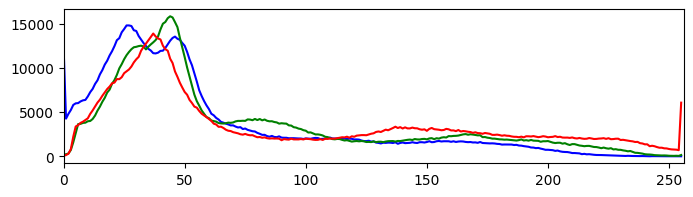

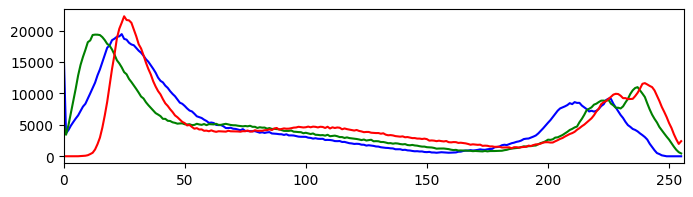

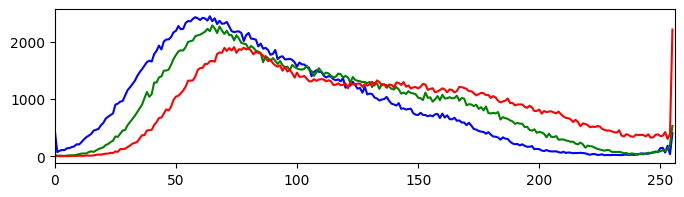

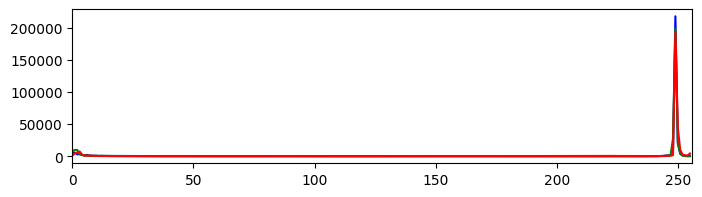

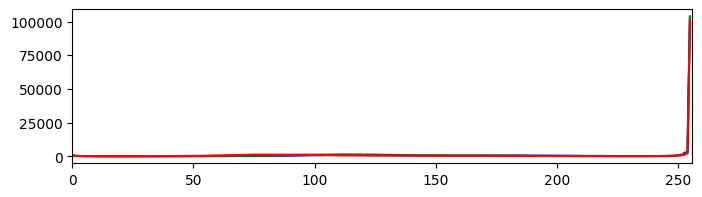

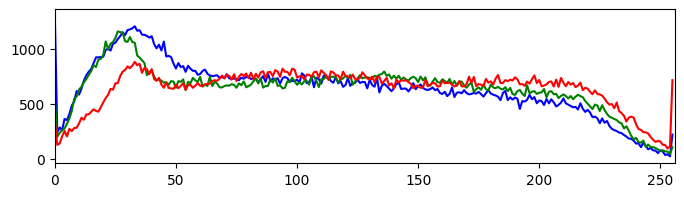

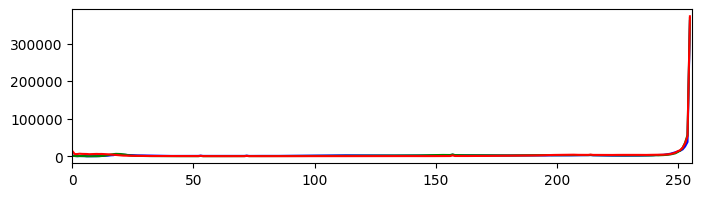

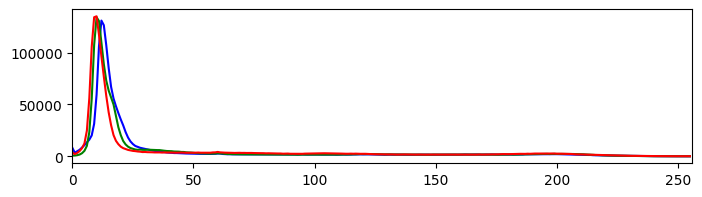

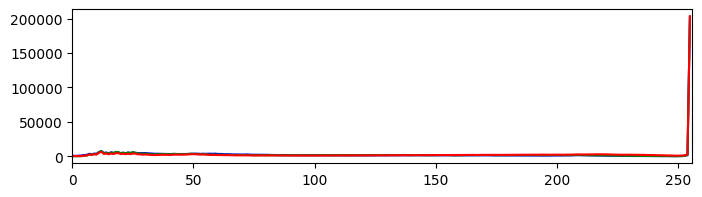

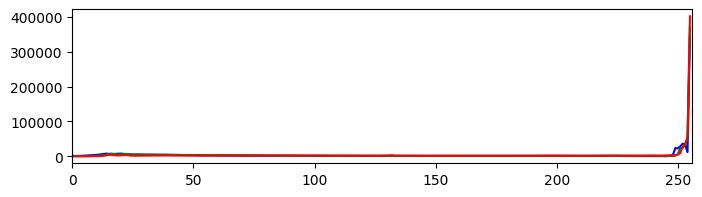

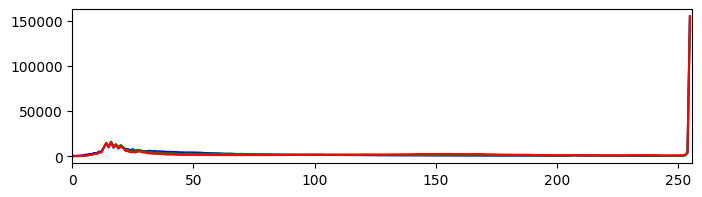

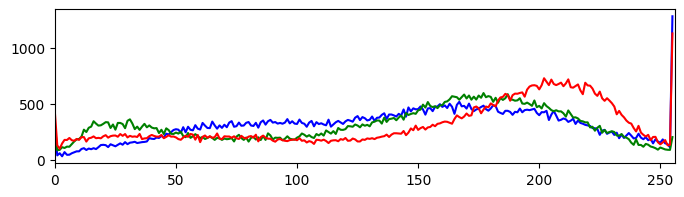

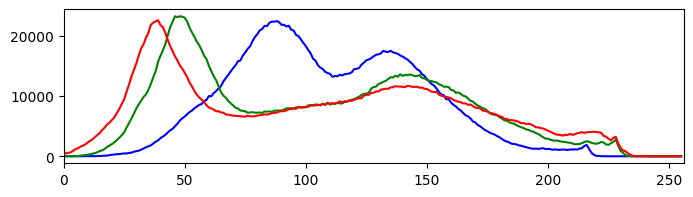

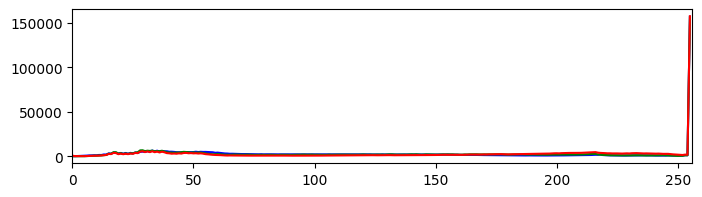

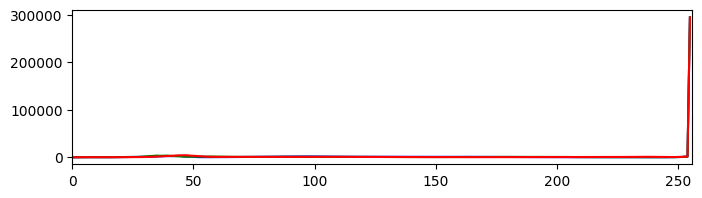

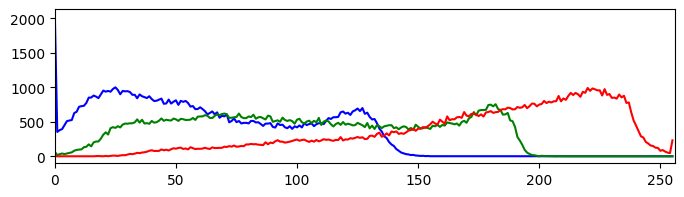

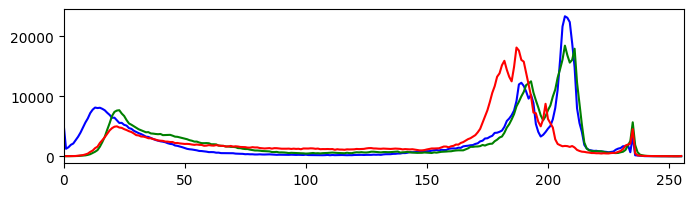

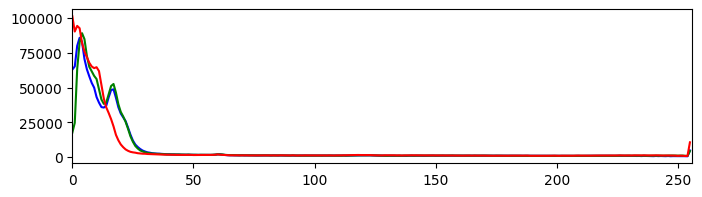

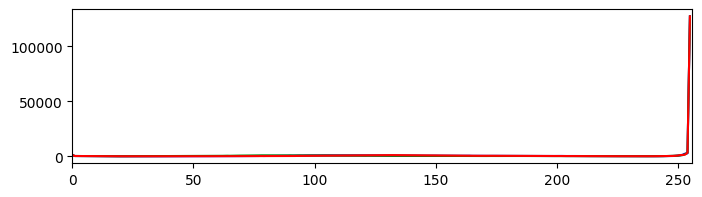

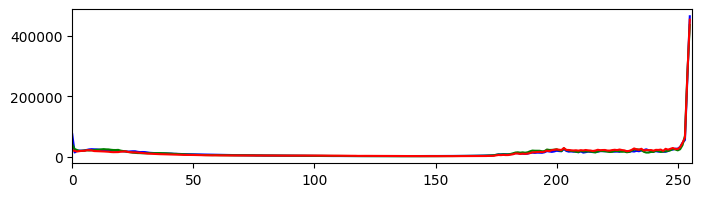

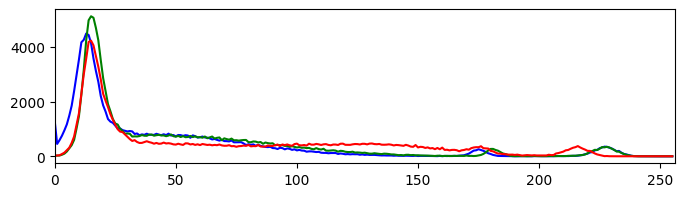

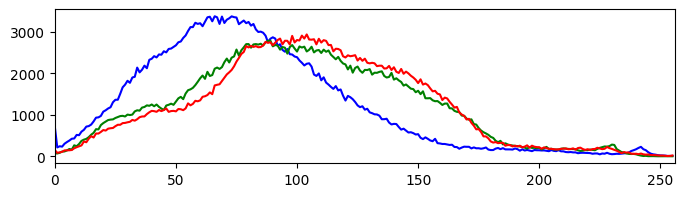

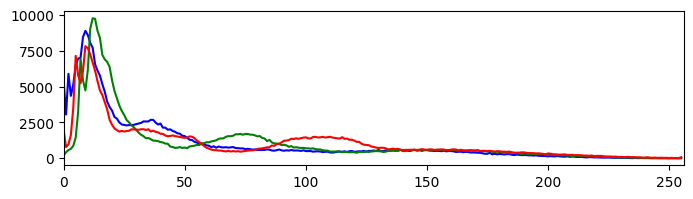

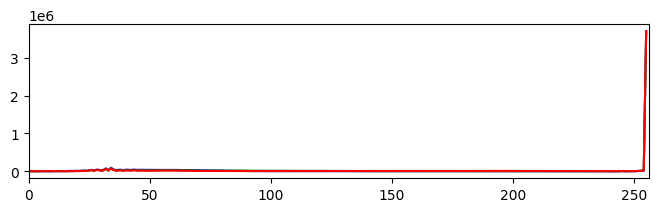

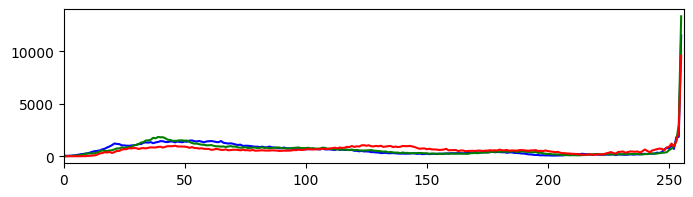

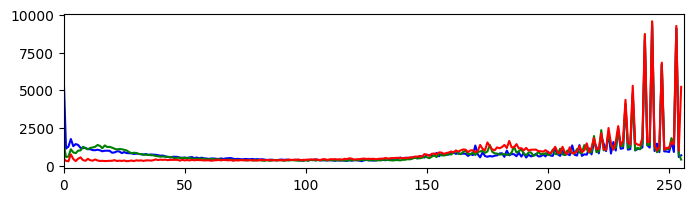

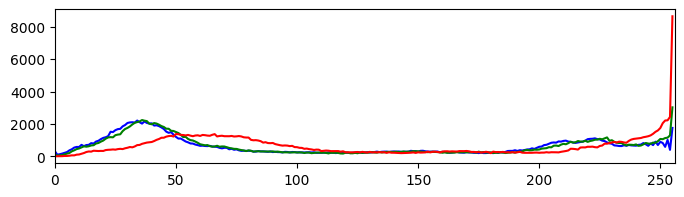

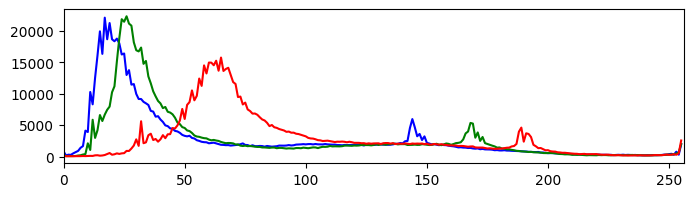

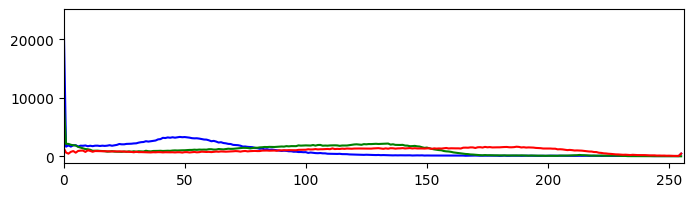

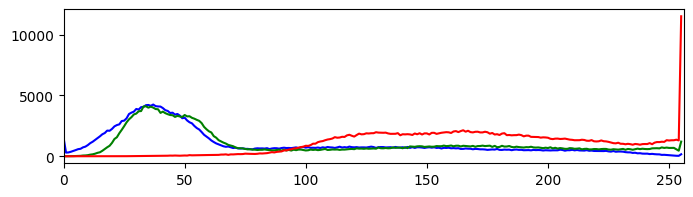

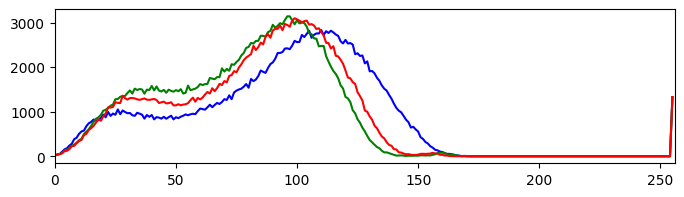

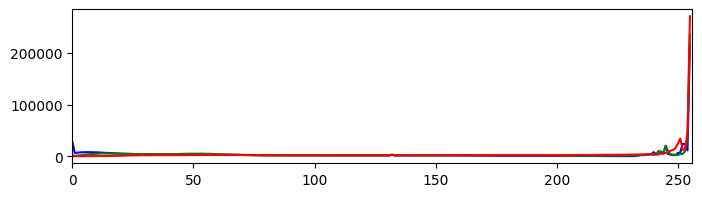

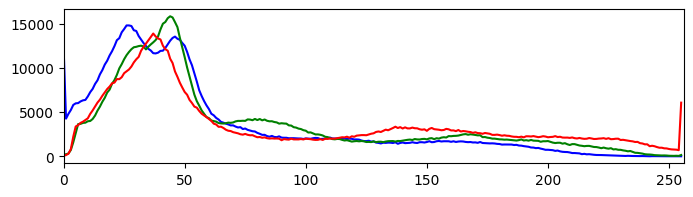

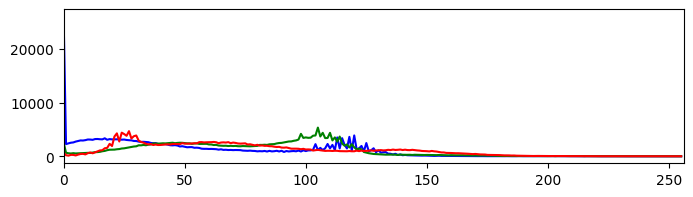

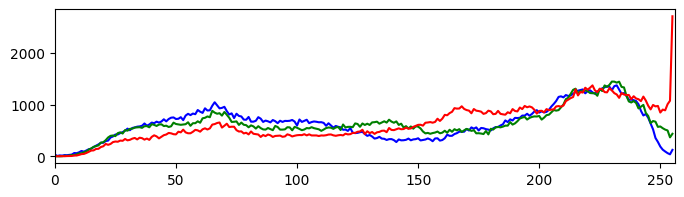

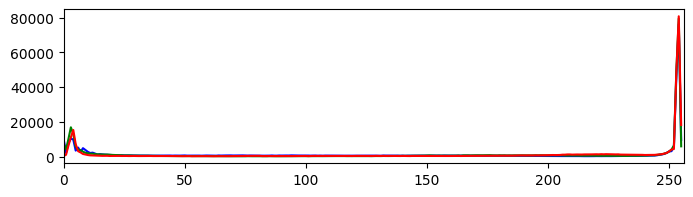

In [327]:
path_cendrawasih = ('/kaggle/input/data-2a/Dataset2A/batik-cendrawasih')


for filename in os.listdir(path_cendrawasih):
    plt.figure(figsize = (8, 2))
    if filename.endswith('.jpg'):
        img_file = os.path.join(path_cendrawasih, filename)
        img = cv2.imread(img_file)
        if img is None:
            continue
        colors = ('b', 'g', 'r')
        for i, col in enumerate(colors):
            hist = cv2.calcHist([img], [i], None, [256], [0, 256])
            plt.plot(hist, color= col)
            plt.xlim([0, 256])
            
        plt.show()

Histogram diatas adalah histogram warna untuk setiap gambar yang ada di batik-cendrawasih

### Histogram Batik Celup

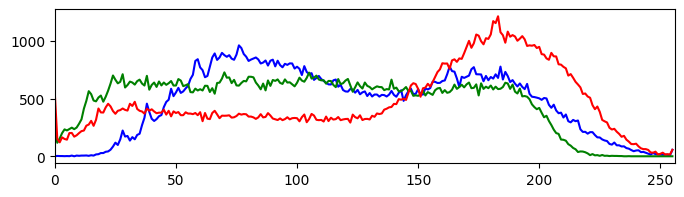

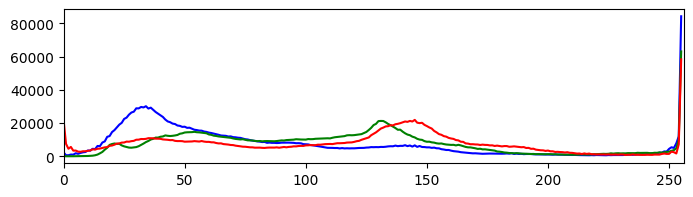

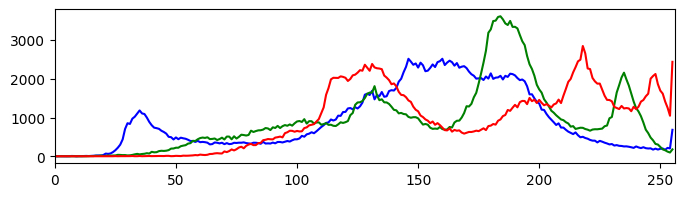

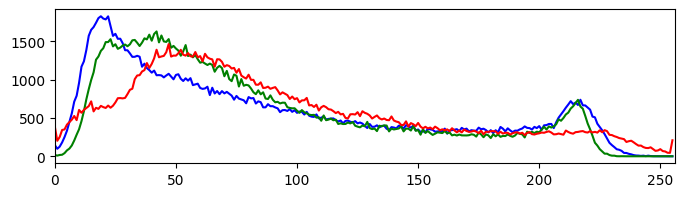

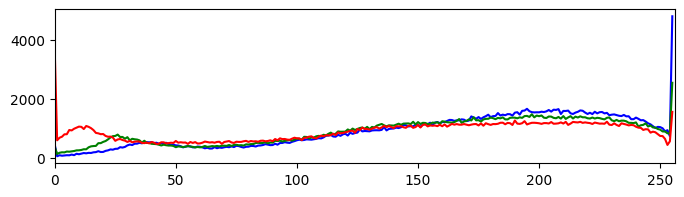

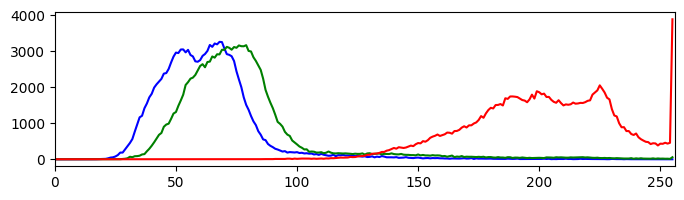

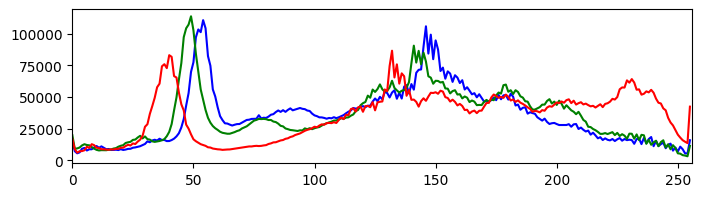

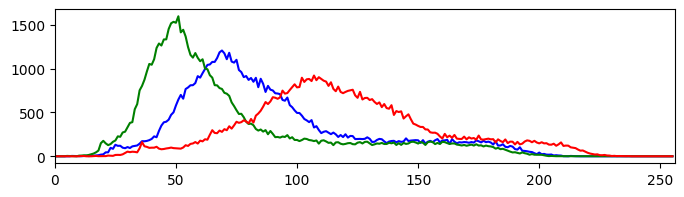

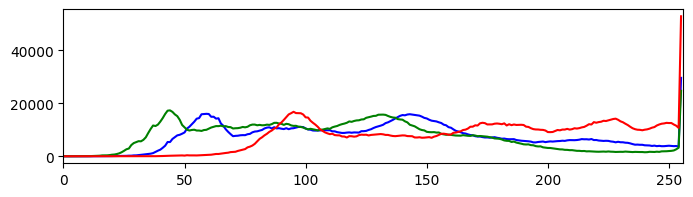

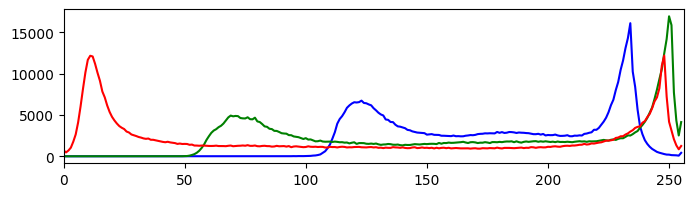

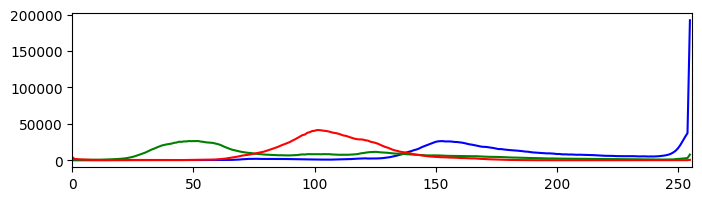

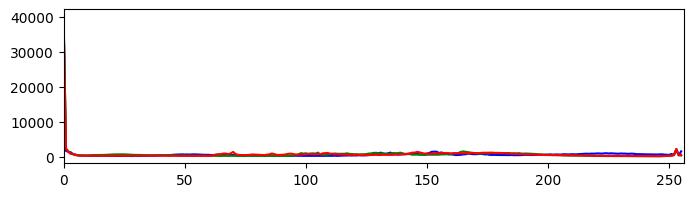

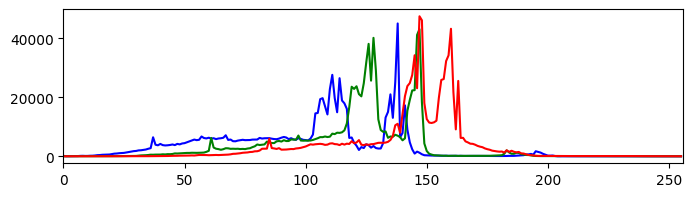

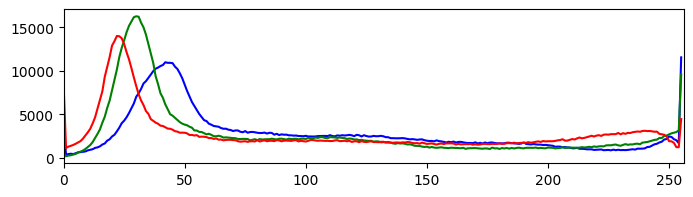

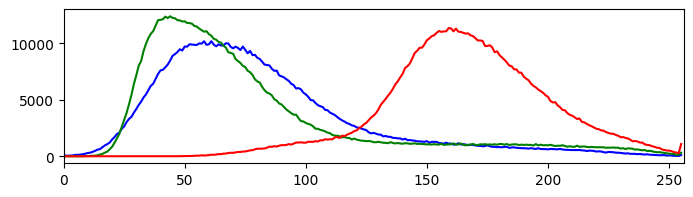

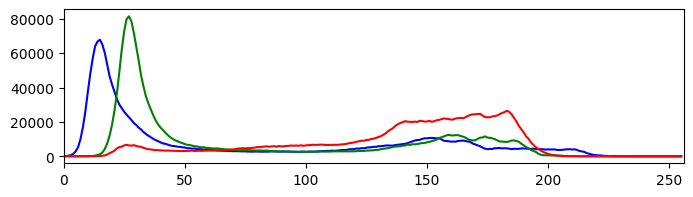

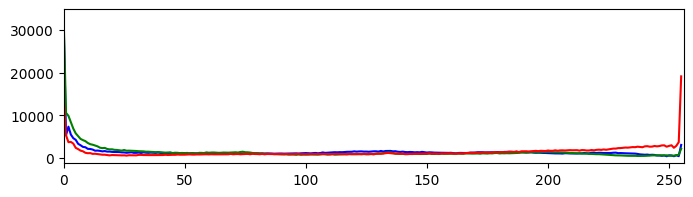

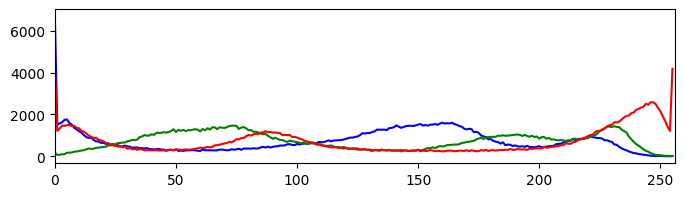

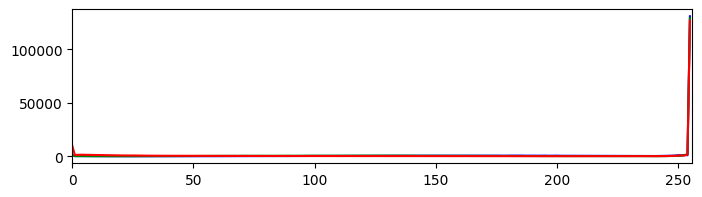

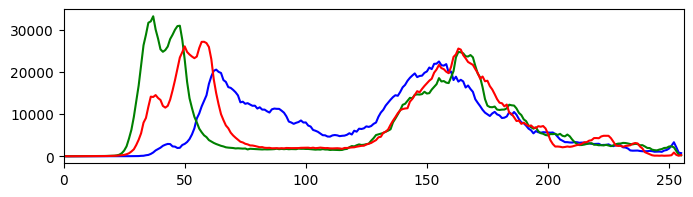

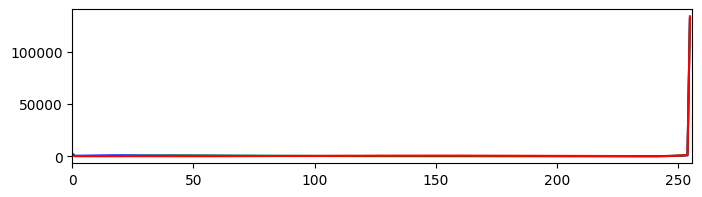

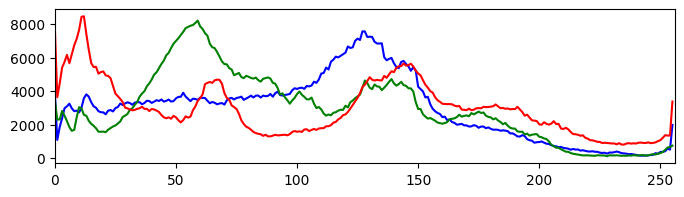

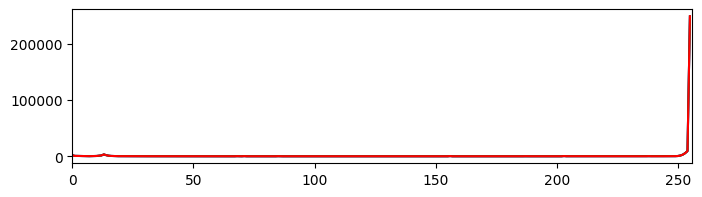

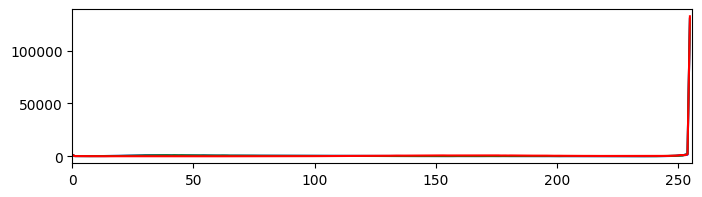

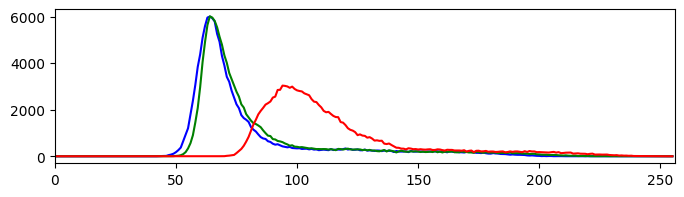

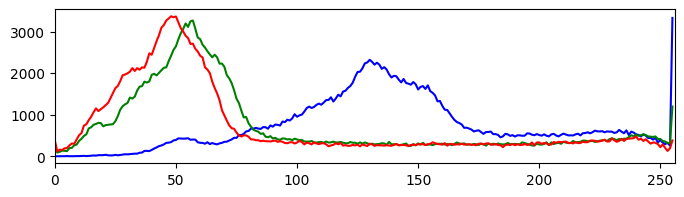

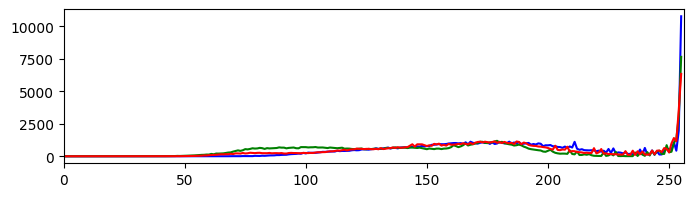

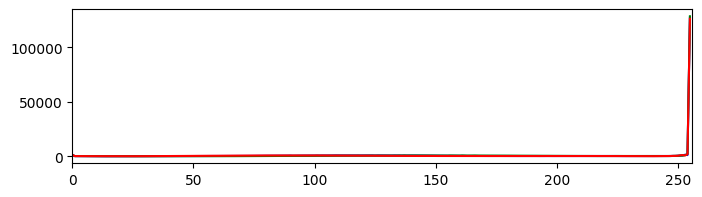

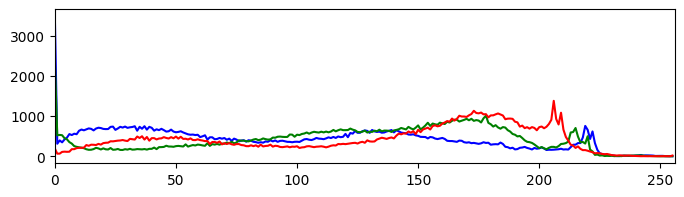

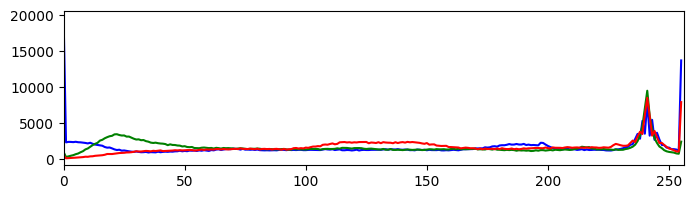

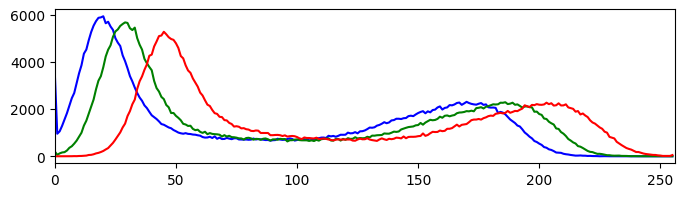

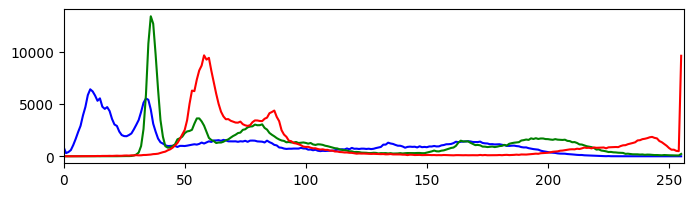

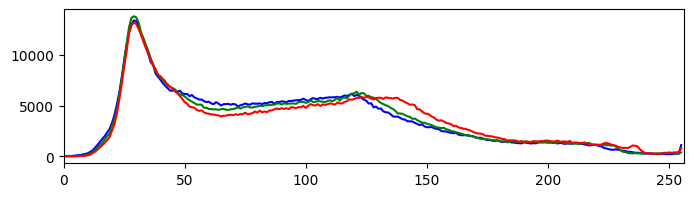

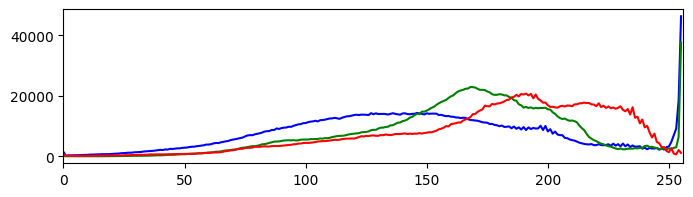

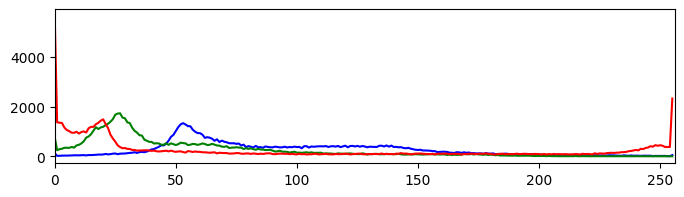

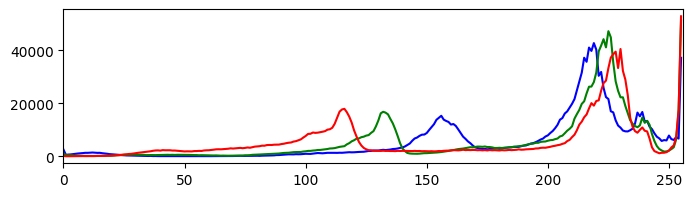

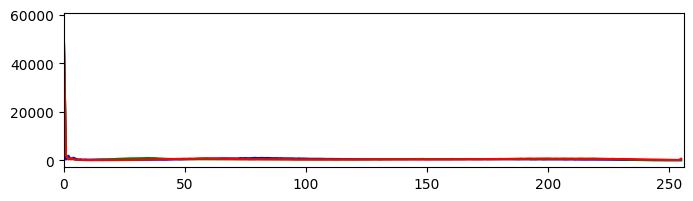

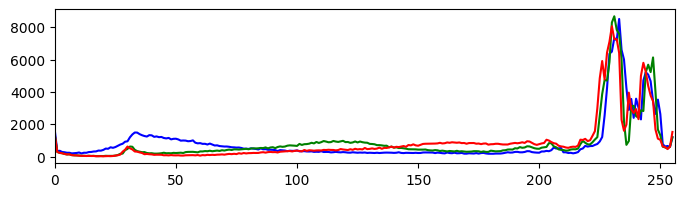

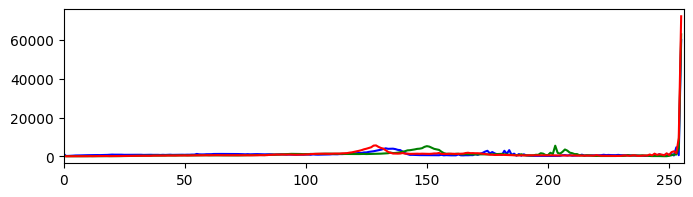

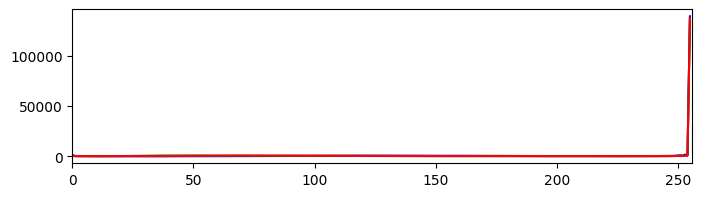

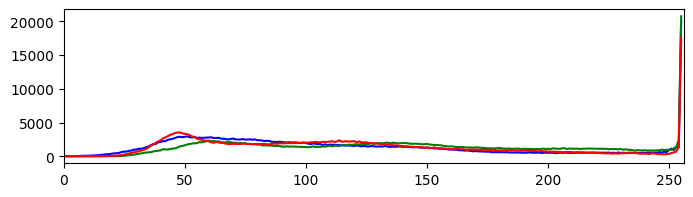

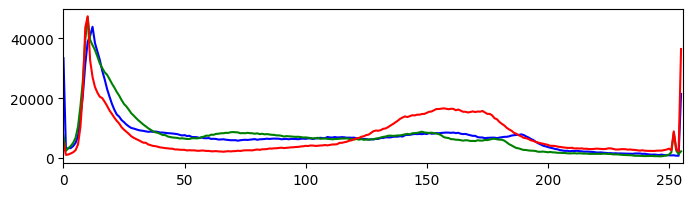

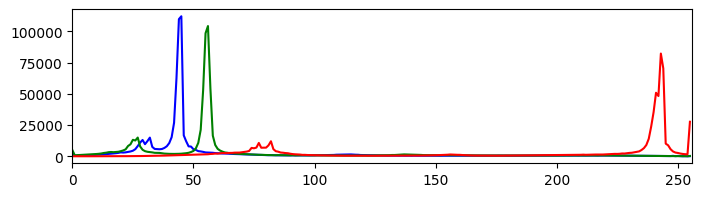

<Figure size 800x200 with 0 Axes>

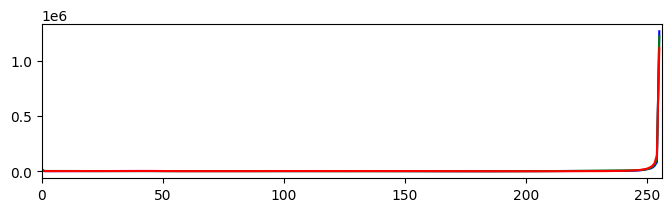

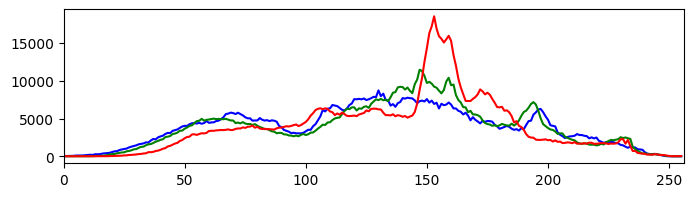

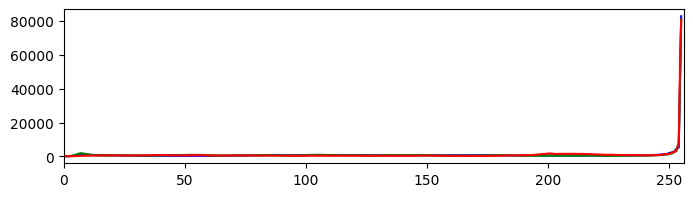

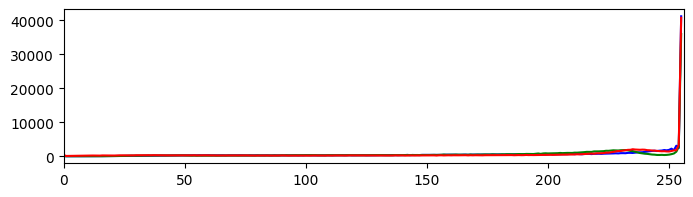

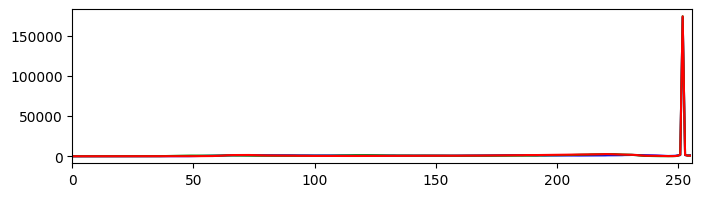

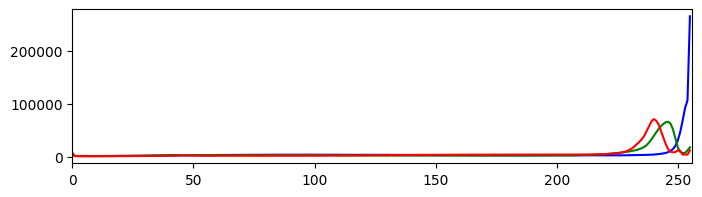

In [328]:
path_celup = ('/kaggle/input/data-2a/Dataset2A/batik-celup')


for filename in os.listdir(path_celup):
    plt.figure(figsize = (8, 2))
    if filename.endswith('.jpg'):
        img_file = os.path.join(path_celup, filename)
        img = cv2.imread(img_file)
        if img is None:
            continue
        colors = ('b', 'g', 'r')
        for i, col in enumerate(colors):
            hist = cv2.calcHist([img], [i], None, [256], [0, 256])
            plt.plot(hist, color= col)
            plt.xlim([0, 256])
            
        plt.show()

Histogram diatas adalah histogram warna untuk setiap gambar yang ada di batik-celup

# B

In [329]:
# os.makedirs("./dataset")
splitfolders.ratio("/kaggle/input/data-2a/Dataset2A", output="/kaggle/working/dataset", seed = 30 , ratio=(.8, .1, .1), )

Membuat directory output /dataset dan menasukan data yang telah dibagi menjadi 80% training, 10% validation, 10% testing di dalamnya

In [330]:
#Creating data generators for train, test and validation datasets
#train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.1, horizontal_flip = True)
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.1, zoom_range=0.2, rotation_range = 2, horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.1, zoom_range=0.2, rotation_range = 2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.1, zoom_range=0.2, rotation_range = 2, horizontal_flip = True)

#Creating train, test and validation datasets
train = train_datagen.flow_from_directory('/kaggle/working/dataset/train', target_size=(64,64), batch_size = 32, class_mode='categorical', seed = 16)
val = val_datagen.flow_from_directory('/kaggle/working/dataset/val', target_size=(64,64), batch_size = 32, class_mode='categorical', seed = 16)
test = test_datagen.flow_from_directory('/kaggle/working/dataset/test', target_size=(64,64), batch_size = 32, class_mode='categorical', seed = 16)

Found 198 images belonging to 5 classes.
Found 24 images belonging to 5 classes.
Found 26 images belonging to 5 classes.


Meng-augmented data yang didapat dan meresizenya menjadi 64 x 64

# C

In [317]:
from keras import models, layers

from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization, Dropout
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import normalize, to_categorical
from tensorflow.keras import regularizers

Mengimport library yang akan digunakan

In [318]:
def build_model():
    model = Sequential()
    model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(64,64,3), padding = "valid"))
    model.add(MaxPooling2D(pool_size=(14,14), strides = (2,2)))

    model.add(Conv2D(filters = 256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding = "same"))
    model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))

    model.add(layers.Conv2D(filters = 384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding = "same"))

    model.add(layers.Conv2D(filters = 384, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding = "same"))

    model.add(layers.Conv2D(filters = 192, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding = "same"))

    model.add(Flatten())
    model.add(Dense(4096,activation='relu'))
    model.add(Dense(4096,activation='relu'))
    model.add(Dense(5,activation = 'softmax'))
    return model

Unutk membuat model, pertama menggunakan Sequntial. lalu akan memasukkan Conv2D dengan filter = 64,  kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(64,64,3), padding = "valid", sesuai dengan ketentuan soal. karena ukuran di soal berubah, akan dilakukan maxpooling dengan pool_size=(14,14), strides = (2,2). Setlah itu masukkan nilai Conv2Dnya kembali sesuai dengan ketentuan soal dst. Lalu akan dilakukan Flatten. Ditambahkan Dense 4096 2 kali dan Dense 5 karena ada 5 class yang tersedia di data.

referensi : https://github.com/krishnaik06/Advanced-CNN-Architectures/blob/master/Transfer%20Learning%20Alexnet.ipynb

In [319]:
model = build_model()
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(model.summary()) 

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_205 (Conv2D)         (None, 60, 60, 64)        4864      
                                                                 
 max_pooling2d_85 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_206 (Conv2D)         (None, 24, 24, 256)       147712    
                                                                 
 max_pooling2d_86 (MaxPoolin  (None, 12, 12, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_207 (Conv2D)         (None, 12, 12, 384)       885120    
                                                                 
 conv2d_208 (Conv2D)         (None, 12, 12, 384)     

Mengcompile menggunakan loss categorical_crossentropy dan metrics accuracy. Total param yang dihasilkan sangat banyak yaitu 133,081,029

In [320]:
history = model.fit(train, epochs = 50, validation_data = val)

Epoch 1/50
7/7 [==============================] - 5s 443ms/step - loss: 3.8989 - accuracy: 0.2222 - val_loss: 3.5638 - val_accuracy: 0.2083
Epoch 2/50
7/7 [==============================] - 3s 384ms/step - loss: 1.9908 - accuracy: 0.1970 - val_loss: 1.6171 - val_accuracy: 0.2083
Epoch 3/50
7/7 [==============================] - 3s 439ms/step - loss: 1.6142 - accuracy: 0.1970 - val_loss: 1.6086 - val_accuracy: 0.2500
Epoch 4/50
7/7 [==============================] - 3s 415ms/step - loss: 1.6088 - accuracy: 0.1869 - val_loss: 1.6134 - val_accuracy: 0.2083
Epoch 5/50
7/7 [==============================] - 3s 340ms/step - loss: 1.7639 - accuracy: 0.2374 - val_loss: 1.6080 - val_accuracy: 0.2083
Epoch 6/50
7/7 [==============================] - 3s 357ms/step - loss: 1.6115 - accuracy: 0.1717 - val_loss: 1.6083 - val_accuracy: 0.2083
Epoch 7/50
7/7 [==============================] - 3s 353ms/step - loss: 1.6104 - accuracy: 0.2020 - val_loss: 1.6078 - val_accuracy: 0.2083
Epoch 8/50
7/7 [====

akan memasukkan model yang telah dibuat ke data val dengan epochs 50

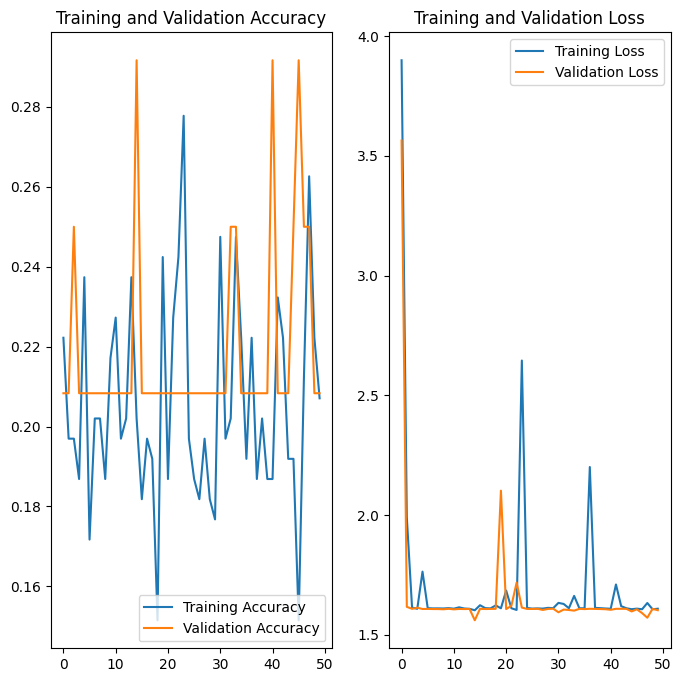

In [321]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

memplot accuracy dan loss dari training dan validation. Dari yang bisa dilihat kalau baseline arsitektur tidak terlalu bagus

In [322]:
model.evaluate(test)

1/1 [==============================] - 0s 338ms/step - loss: 1.6047 - accuracy: 0.1923


[1.6047009229660034, 0.19230769574642181]

Model baseline artisitektur memiliki loss 1,6 dan akurasi sekitar 19%. Hal ini disebakan karena model yang dibuat sangat kompleks tetapi data yang didapatkan hanya sedikti sehingga sulit untuk memprediksi kebenarannya

# D

## Fine Tuning Parameter

In [312]:
def build_model_FT():
    model = Sequential()
    model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(64,64,3), padding = "valid"))
    model.add(MaxPooling2D(pool_size=(14,14), strides = (2,2)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(filters = 30, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding = "same"))
    model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))
    
    model.add(layers.Conv2D(filters = 40, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding = "same"))

    model.add(layers.Conv2D(filters = 40, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding = "same"))

    model.add(layers.Conv2D(filters = 25, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding = "same"))

    model.add(Flatten())
    model.add(Dense(50,activation='relu'))
    model.add(Dense(5,activation = 'softmax'))
    return model

Mengganti baseline arsitektur menjadi lebih simpel untuk menyesuaikan dengan kedikitan data. Dikurangkan filter yang akan digunakan dan menambahkan BatchingNormalization.

In [313]:
modelFT = build_model_FT()
modelFT.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001),loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(modelFT.summary()) 

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_200 (Conv2D)         (None, 60, 60, 64)        4864      
                                                                 
 max_pooling2d_83 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_73 (Bat  (None, 24, 24, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_201 (Conv2D)         (None, 24, 24, 30)        17310     
                                                                 
 max_pooling2d_84 (MaxPoolin  (None, 12, 12, 30)       0         
 g2D)                                                            
                                                     

Menggunakan optimizer adam dan menambahkan learning rate menjadi 0.00001. Bisa terlihat dari summary kalau param yang dihasilkan menurun jadi hanya 237,040

In [314]:
history = modelFT.fit(train, epochs = 75, validation_data = val, batch_size = 4)

Epoch 1/75
7/7 [==============================] - 5s 431ms/step - loss: 1.6393 - accuracy: 0.2222 - val_loss: 1.6098 - val_accuracy: 0.2083
Epoch 2/75
7/7 [==============================] - 3s 373ms/step - loss: 1.6238 - accuracy: 0.1919 - val_loss: 1.6096 - val_accuracy: 0.1250
Epoch 3/75
7/7 [==============================] - 3s 397ms/step - loss: 1.6342 - accuracy: 0.1869 - val_loss: 1.6094 - val_accuracy: 0.2500
Epoch 4/75
7/7 [==============================] - 3s 410ms/step - loss: 1.6219 - accuracy: 0.2071 - val_loss: 1.6099 - val_accuracy: 0.2083
Epoch 5/75
7/7 [==============================] - 3s 369ms/step - loss: 1.6143 - accuracy: 0.2273 - val_loss: 1.6110 - val_accuracy: 0.2083
Epoch 6/75
7/7 [==============================] - 3s 375ms/step - loss: 1.6124 - accuracy: 0.2374 - val_loss: 1.6095 - val_accuracy: 0.1667
Epoch 7/75
7/7 [==============================] - 2s 351ms/step - loss: 1.6134 - accuracy: 0.2323 - val_loss: 1.6091 - val_accuracy: 0.2083
Epoch 8/75
7/7 [====

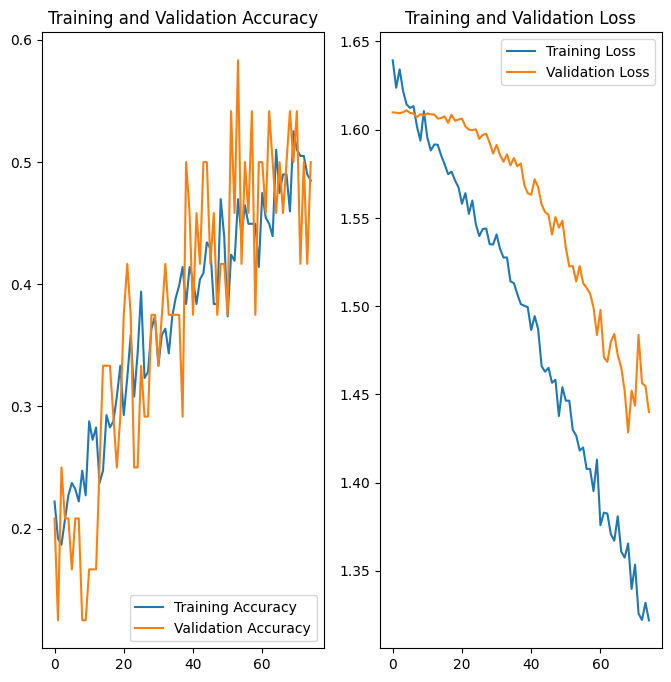

In [315]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

Setelah diganti baseline arsitekturnya dan diganti parameter, gambar yang dihasilkan berubah menjadi seperti diatas

# E

In [316]:
modelFT.evaluate(test)

1/1 [==============================] - 0s 329ms/step - loss: 1.4231 - accuracy: 0.5385


[1.4231200218200684, 0.5384615659713745]

Bisa dilihat setelah diganti baseline arsitektur dan parameternya kalau hasil loss menurun menjadi 1,4 dan akurasi naik menjadi sekitar 53%. Hal ini disebabkan karena model arsitektur terlalu kompleks untuk data sehingga data tidak terprediksi dengan akurat. Dengan membuat baseline arsitektur yang lebih sederhana, hasil yang diberikan akan menjadi lebih baik daripada jika tidak diganti. Dengan ditambahkannya epoch juga membantu model deep learning untuk medeteksi pola. 